Portuguse version: https://bit.ly/2y04JMS

Dataset by: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

Last update: 17/04/20

ps: variable names is in portuguese in the future they will be translated as well


# Changelog

version control in GIT, clicking on the version number will take you to the corresponding repository

---
v1.0 

*   Initial Version



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Bugs fix   

[v1.1](git.com.br) 
*   Enhanced Brazil predict of cases and death
*   Texts translated to english
*   Delete useless imports
*   Bugs fix

[v2.0](https://github.com/Luscahm/covid_prediction/tree/v2.0.x)
* Improvement in some graphics
* New Graphics
* Improvement in the results presentation tables
* Improved forecasting of cases and deaths in the USA
* Added "About Me" section


In [0]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


plt.style.use('seaborn-darkgrid')

# Data Reading


---



* Transform the csv available on Git into a pandas dataframe
*   Split in 4 Dataframe: 
      1.   Brazil
      2.   US
      3.   Sweden
      4.   Italy


*   Remove parts of the dataframe that will not be used
*   we will use 3 dataframe for each country: Confirmed, Deaths and Recovered









In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [3]:
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,444,484,521,555,607,665,714,784,840,906
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,400,409,416,433,446,467,475,494,518,539
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,564,583,601,601,638,646,659,673,673,696
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19


In [0]:
# split dataframe in locals dataframe

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [5]:
df_confirmados_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682


In [6]:
df_confirmados_italia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434


In [7]:
df_confirmados_eua.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706


In [8]:
df_confirmados_suecia.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
205,NaN,Sweden,63.0,16.0,0,0,0,0,0,0,...,8419,9141,9685,10151,10483,10948,11445,11927,12540,13216


In [0]:
# Making all dataframes started 1 day after 1º case of covid
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Data Processing

 Machine learning algorithm does not accept dates in the MM/DD/YY format, we will perform some treatments in these dataframes to get what we want, we will perform the following steps:


*  Extract columns index
*   Extract case numbers from each country
*   transform dates into calendar days, 1st day of covid = 0, second = 1 ...
*   Choose how many calendar days in the future we want to make the prediction
*   Transform the calendar days to mm/dd/yy format
*   Transpose all dataframes










In [0]:
# Geting the index columns
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# geting  values ​​of all brazil df to assist in the construction of graphics:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# making the same for us
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# making the same for Italy
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# making the same for Sweden
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transform dates into a numpy array of calendar days:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # this variable defines how many days ahead we want to predict.

# making future dates in a calendar day numpy array
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transforming future calendar day in mm/dd/yy format
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transposing all dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [19]:
df_confirmados_brasil.head()


,28,dates
2/26/20,1,2/26/20
2/27/20,1,2/27/20
2/28/20,1,2/28/20
2/29/20,2,2/29/20
3/1/20,2,3/1/20


In [0]:
# as we have seen the indexes are wrong, we will fix them now.

df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

below, we will see the dataframes transposed



In [21]:
df_confirmados_brasil.head()

,cases,dates
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4


In [22]:
df_mortes_eua.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [23]:
df_recuperados_suecia.head()

,recovery,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [24]:
df_mortes_italia.head()

,deaths,dates
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


the part of separating target data, and separating in train and test will be done in the prediction section


# Graphic Presentation

In this section, a few graphs will be presented that will help us to understand the situation of the covid-19 in the 4 selected countries



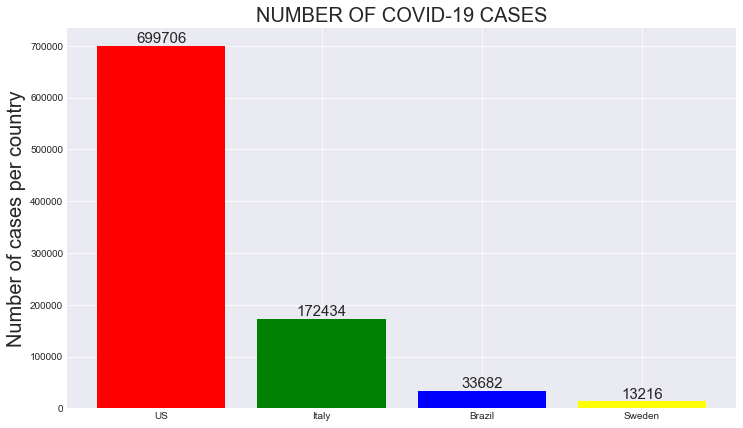

In [25]:
fig = plt.figure(figsize=(12, 7))
country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
rects = plt.bar(country,numbers, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    

plt.ylabel('Number of cases per country', size = 20)
plt.title('NUMBER OF COVID-19 CASES', size=20)
plt.show()

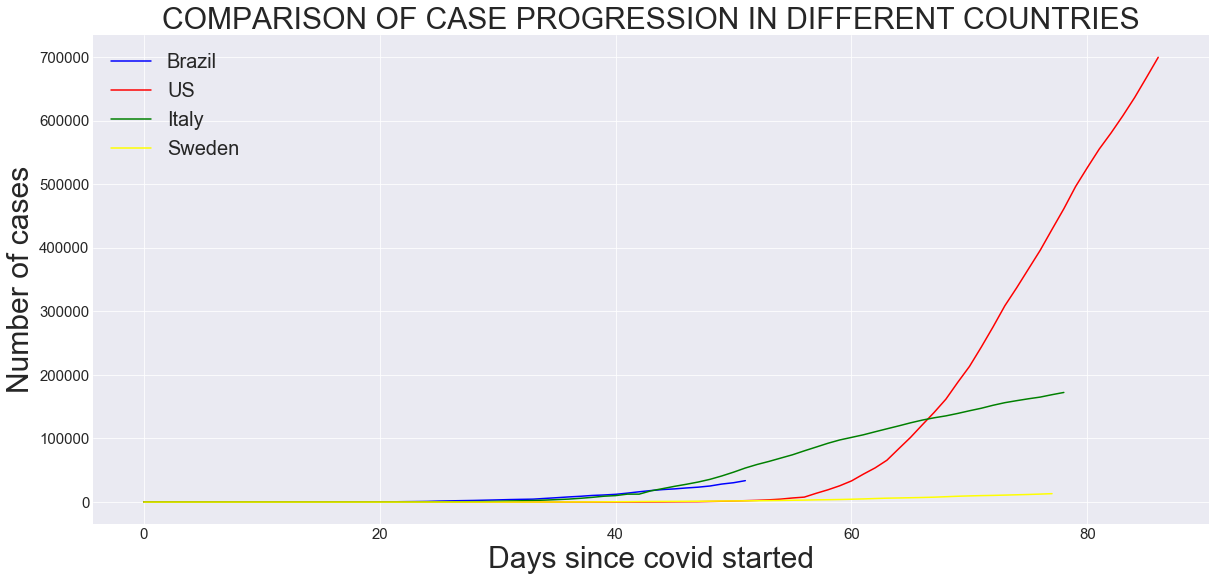

In [26]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARISON OF CASE PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Sweden looks almost like a straight line when comparing with USA and Italy, Brazil is also very discreet next to Italy and USA, ahead we will compare these countries 2 to 2

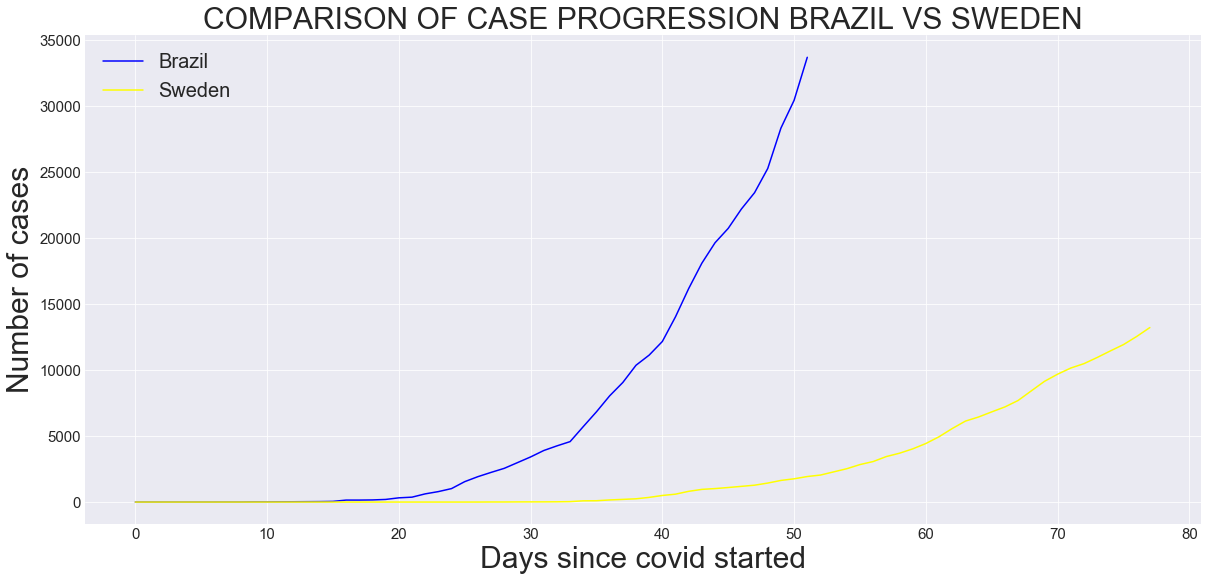

In [27]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


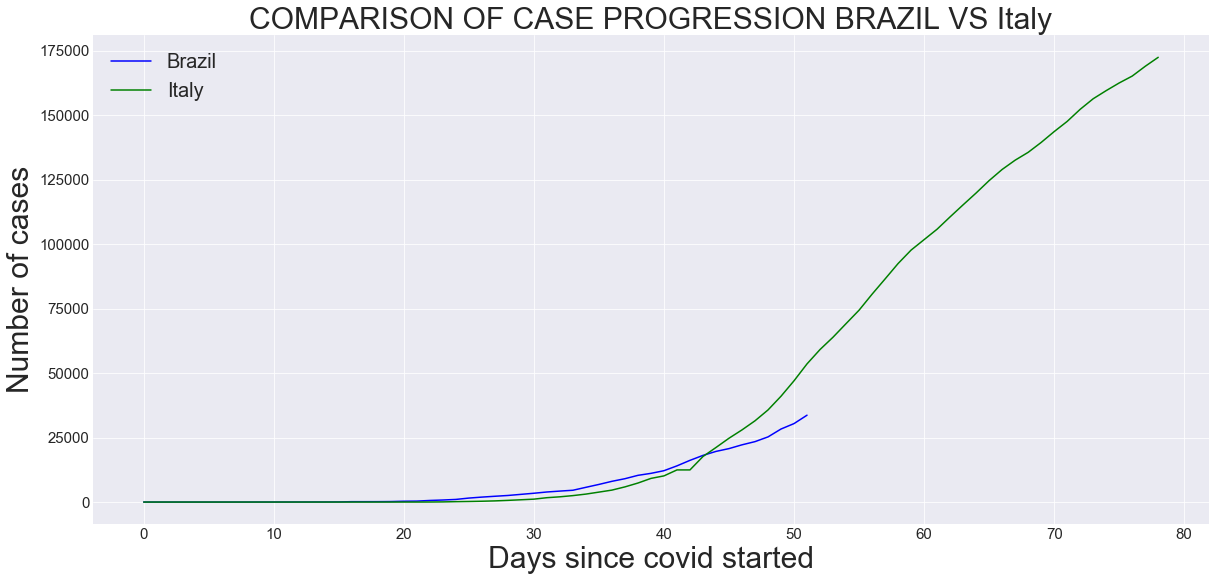

In [28]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_italia, casos_italia, color='green')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS Italy', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Italy'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


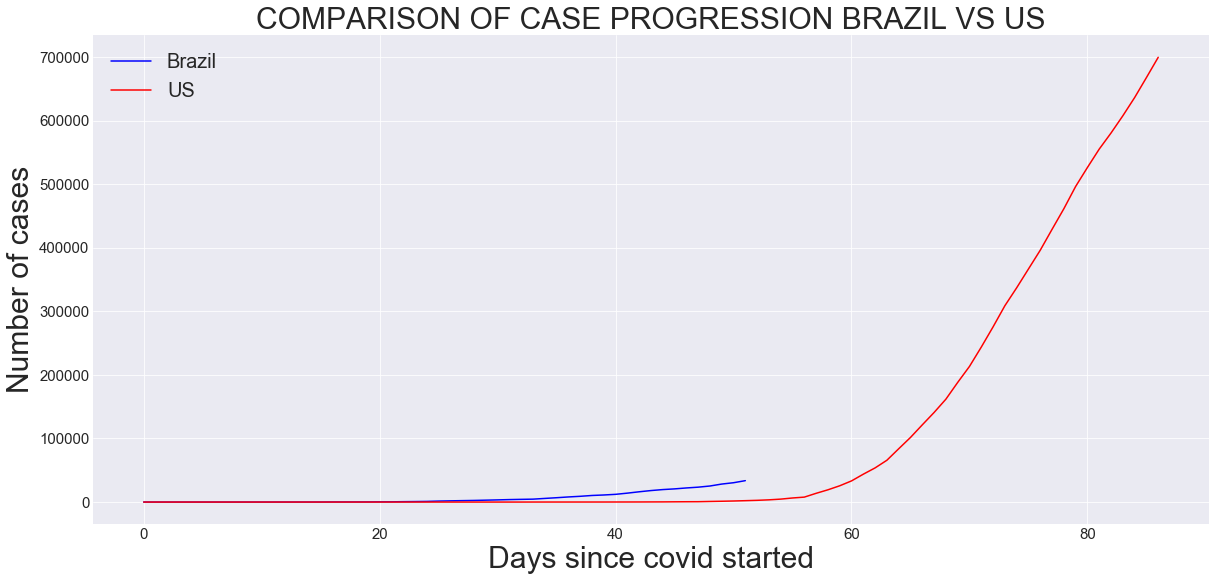

In [29]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


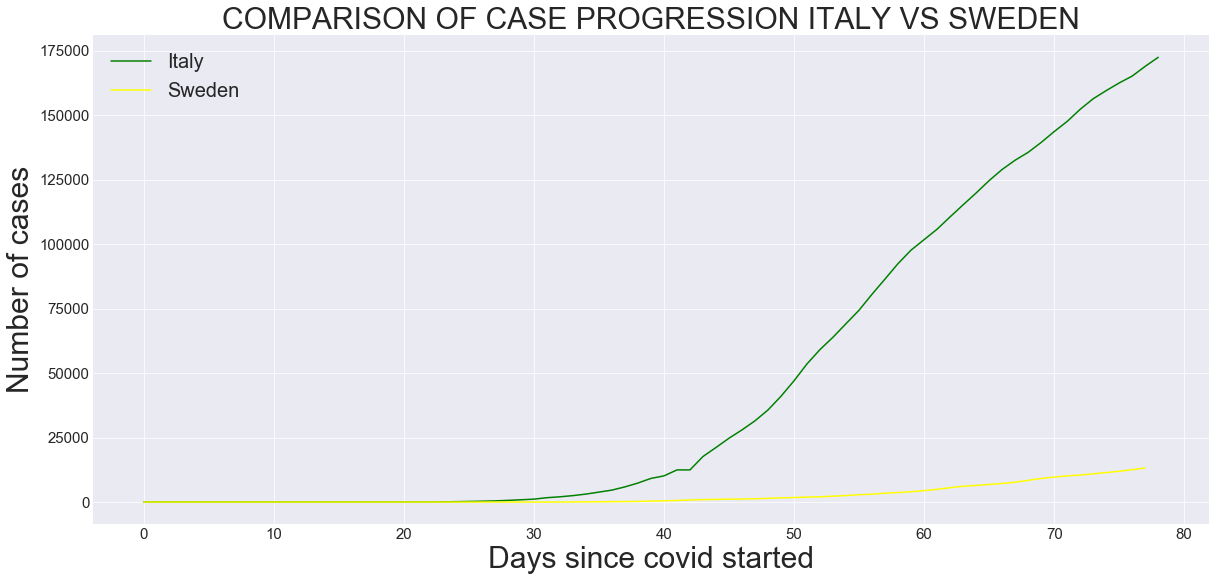

In [30]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


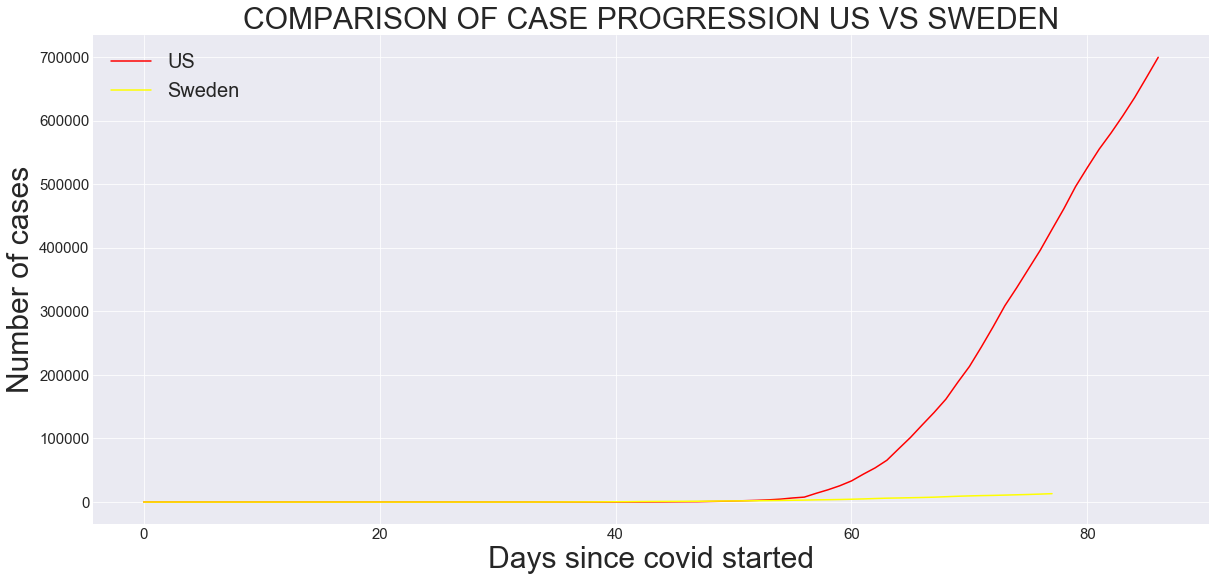

In [31]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_suecia, casos_suecia, color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION US VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['US', 'Sweden'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


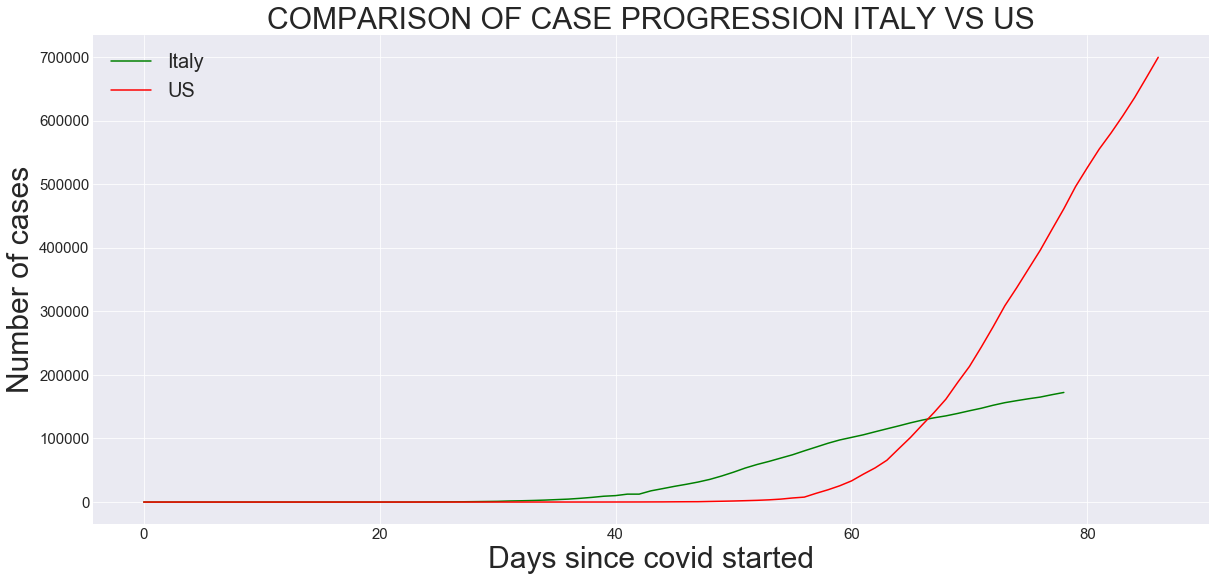

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_eua, casos_eua, color='red')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


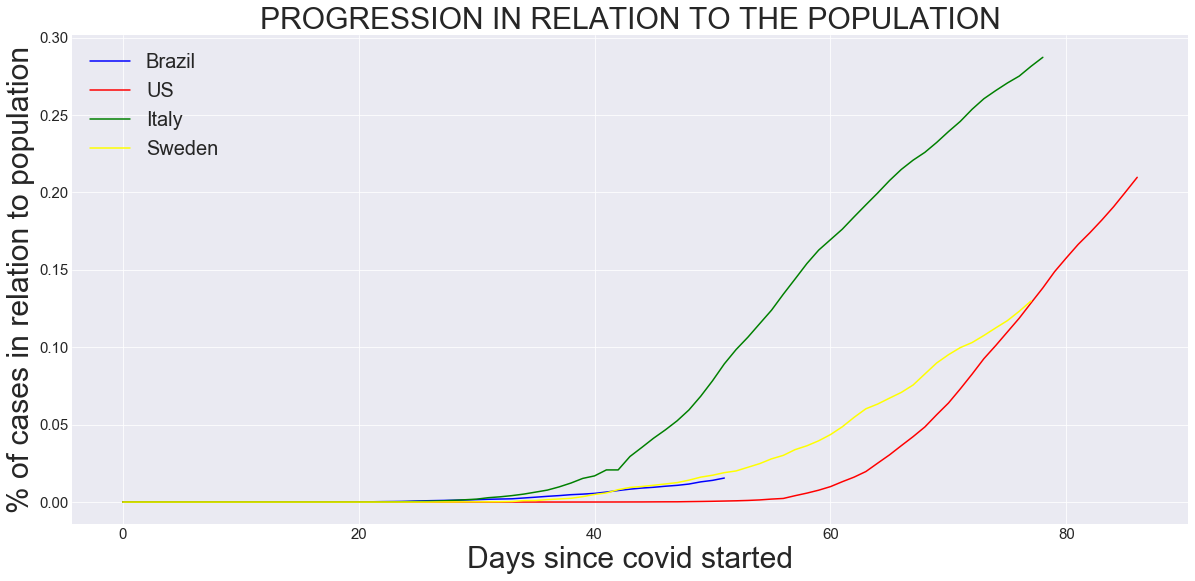

In [33]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION IN RELATION TO THE POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


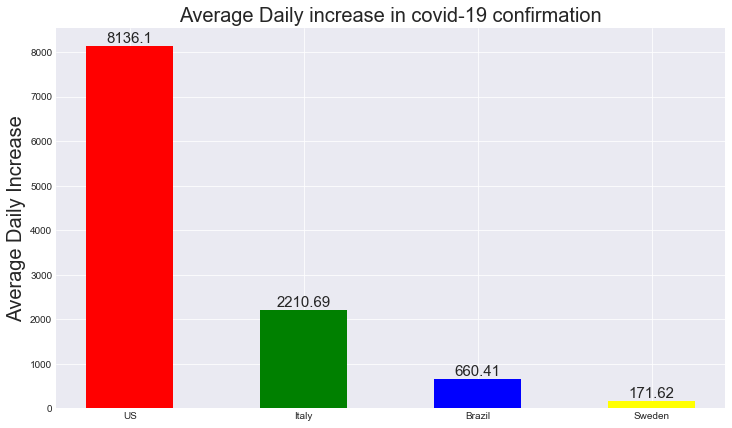

In [36]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)
difference_us =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
difference_italy =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
difference_brazil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
difference_sweden =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
difference_us = np.array(difference_us).mean()
difference_italy = np.array(difference_italy).mean()
difference_brazil = np.array(difference_brazil).mean()
difference_sweden = np.array(difference_sweden).mean()

country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [difference_us, difference_italy, difference_brazil, difference_sweden]
numbers = [round(m, 2) for m in numbers]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(country, numbers, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Average Daily Increase', size = 20)
plt.title('Average Daily increase in covid-19 confirmation', size=20)
plt.show()


** WHAT CAN BE REPAIRED THROUGH THESE CASE GRAPHICS:**
* Italy is moving towards stabilization


* Sweden as well as Brazil is on its rise, although Sweden took longer, it is very similar to Brazil
* **When we use a percentage of population, Brazil has the least number of cases** and it is growing at the same rate as in Sweden, so it is expected that by the 70th day Brazil will have  172 thousand cases
* Brazil as well as Sweden, tend to have more percentage cases than the United States
* Italy grew by a very large percentage
* Despite the flattening, Italy has a very large average of daily cases







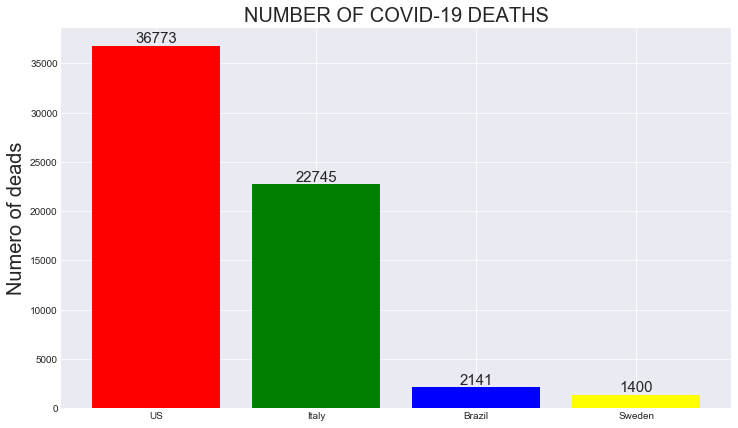

In [37]:
fig = plt.figure(figsize=(12, 7))
country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [mortos_eua,mortos_italia,mortos_brasil, mortos_suecia]
rects = plt.bar(country,numbers, align='center', color=['red', 'green', 'blue', 'yellow'])
ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)

plt.ylabel('Numero of deads', size = 20)
plt.title('NUMBER OF COVID-19 DEATHS', size=20)
plt.show()

In [38]:
fig = plt.figure(figsize=(12, 7))
country = ['EUA', 'Italia', 'Brasil', 'Suecia']
numbers = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
numbers = [round(num, 2) for num in numbers]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% Lethality', size = 20)
plt.title('LETHALY in % OF COVID ', size=20)
plt.show()

NameError: ignored

<Figure size 864x504 with 0 Axes>

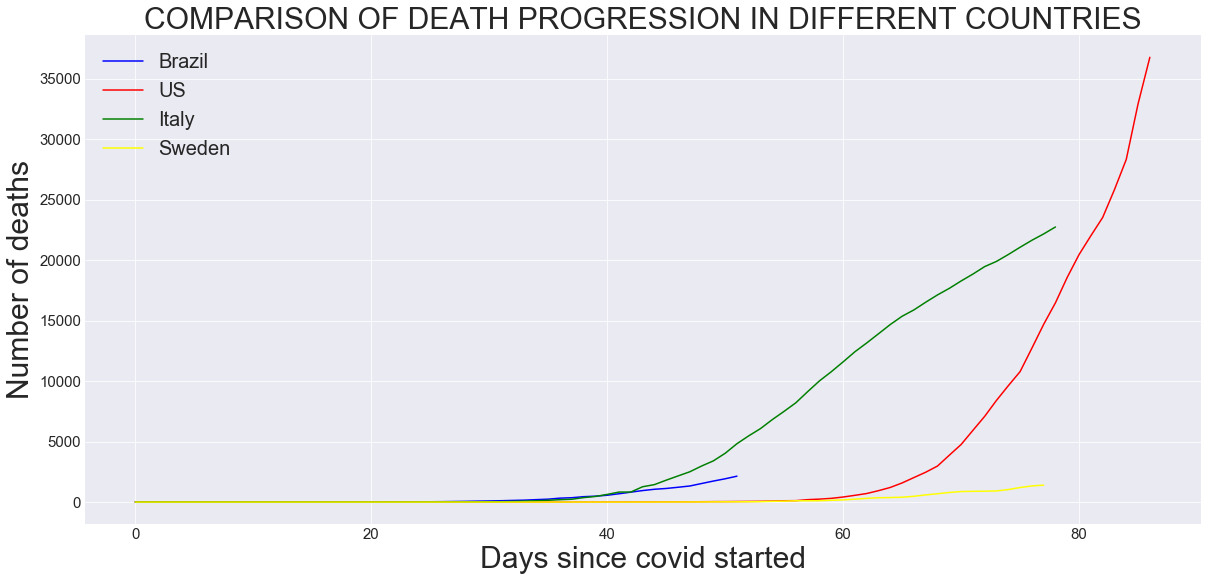

In [39]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARISON OF DEATH PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


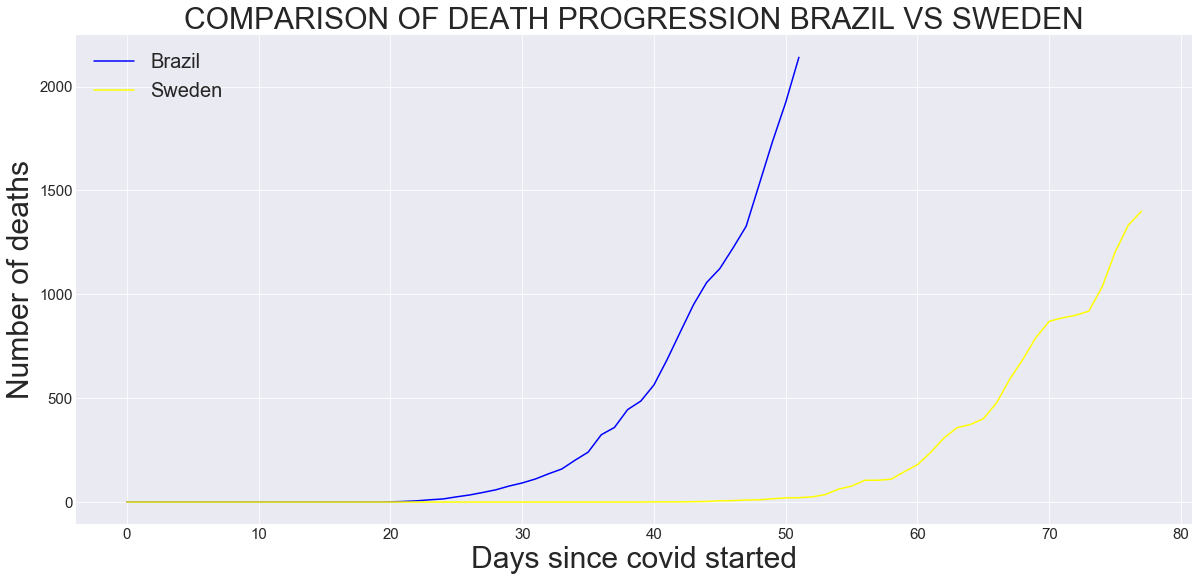

In [40]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_suecia, mortes_suecia, color='yellow')


plt.title('COMPARISON OF DEATH PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


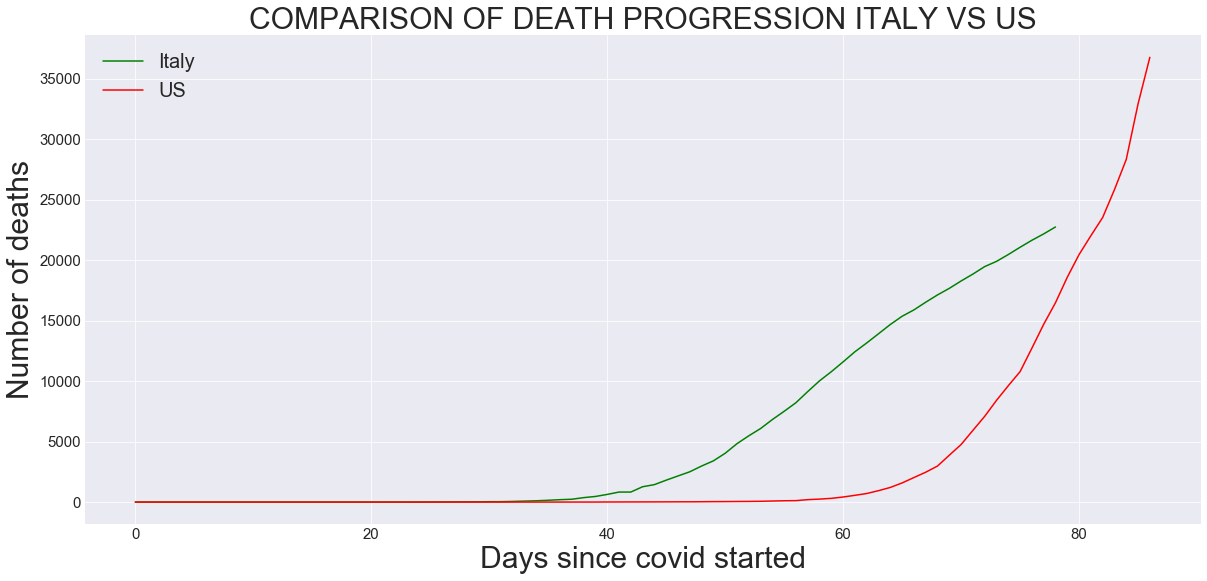

In [41]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_eua, mortes_eua, color='red')

plt.title('COMPARISON OF DEATH PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


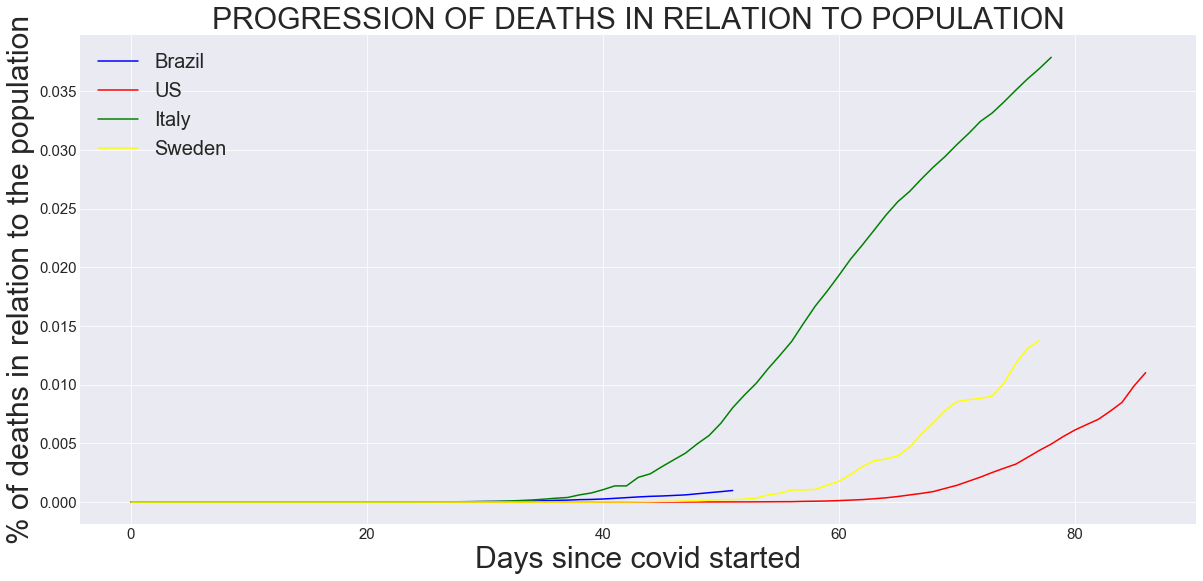

In [42]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to the population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


When we see deaths in relation to% of population, we notice some things


* Italy is still fired up front with more numbers of deaths
* Sweden comes in front of Brazil and the USA
* Brazil is growing faster than the USA and Sweden
* Sweden and USA are on their growth curve

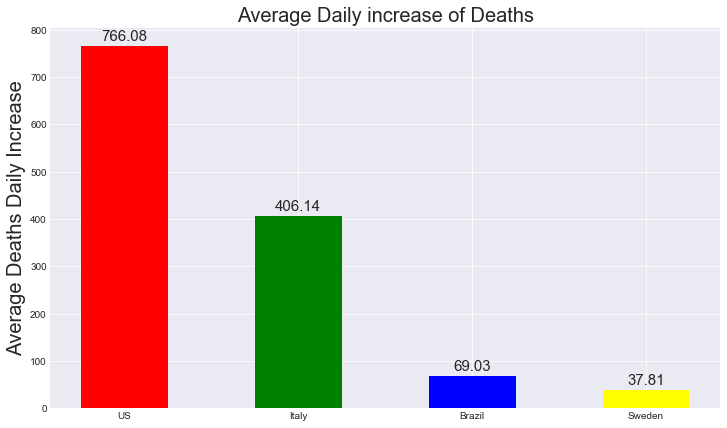

In [43]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua[38:])))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_italia[22:])))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil[20:])))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia[40:])))
next(conf_su2)
difference_us =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
difference_italy =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
difference_brazil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
difference_sweden =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
difference_us = np.array(difference_us).mean()
difference_italy = np.array(difference_italy).mean()
difference_brazil = np.array(difference_brazil).mean()
difference_sweden = np.array(difference_sweden).mean()

country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [difference_us, difference_italy, difference_brazil, difference_sweden]
numbers = [round(m, 2) for m in numbers]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(country, numbers, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Average Deaths Daily Increase', size = 20)
plt.title('Average Daily increase of Deaths', size=20)
plt.show()

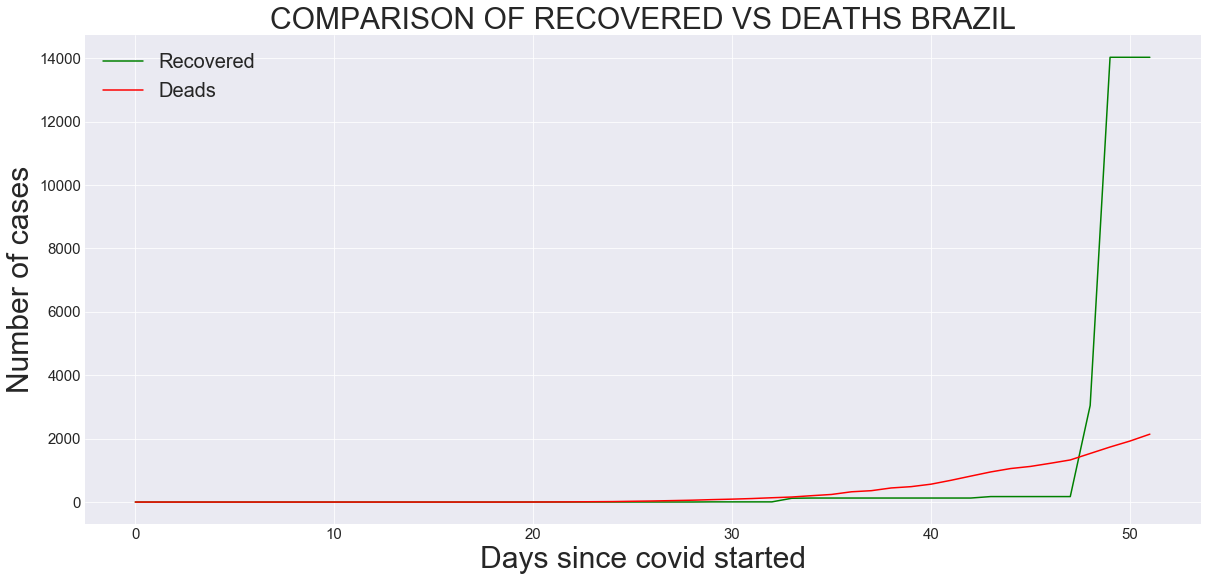

In [44]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, color='green')
plt.plot(dias_brasil, mortes_brasil, color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS BRAZIL', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


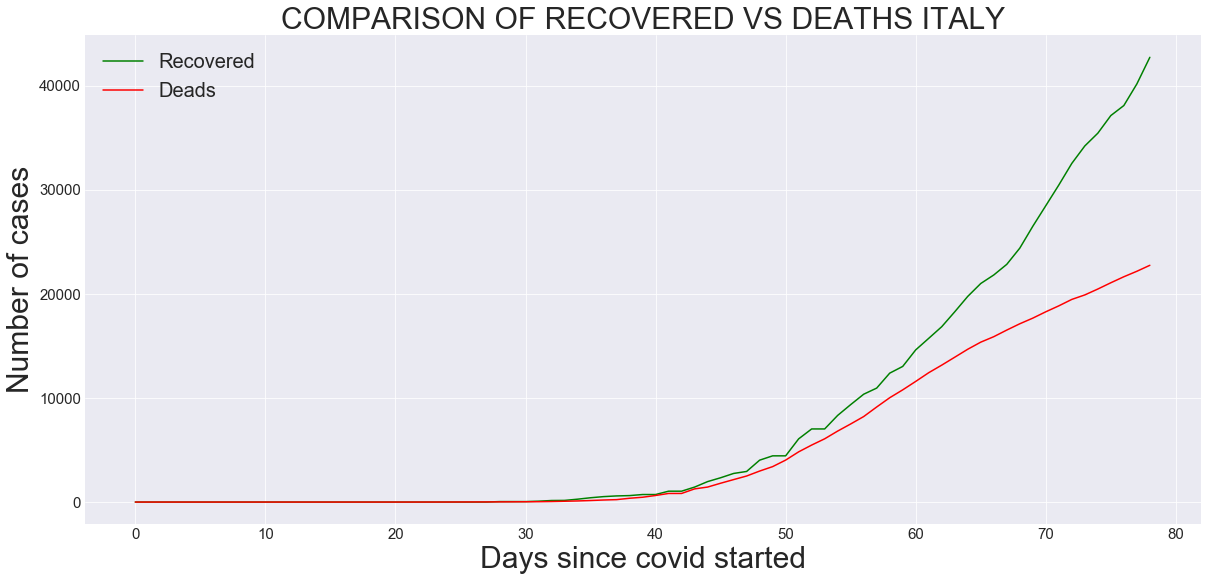

In [45]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, color='green')
plt.plot(dias_italia, mortes_italia, color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


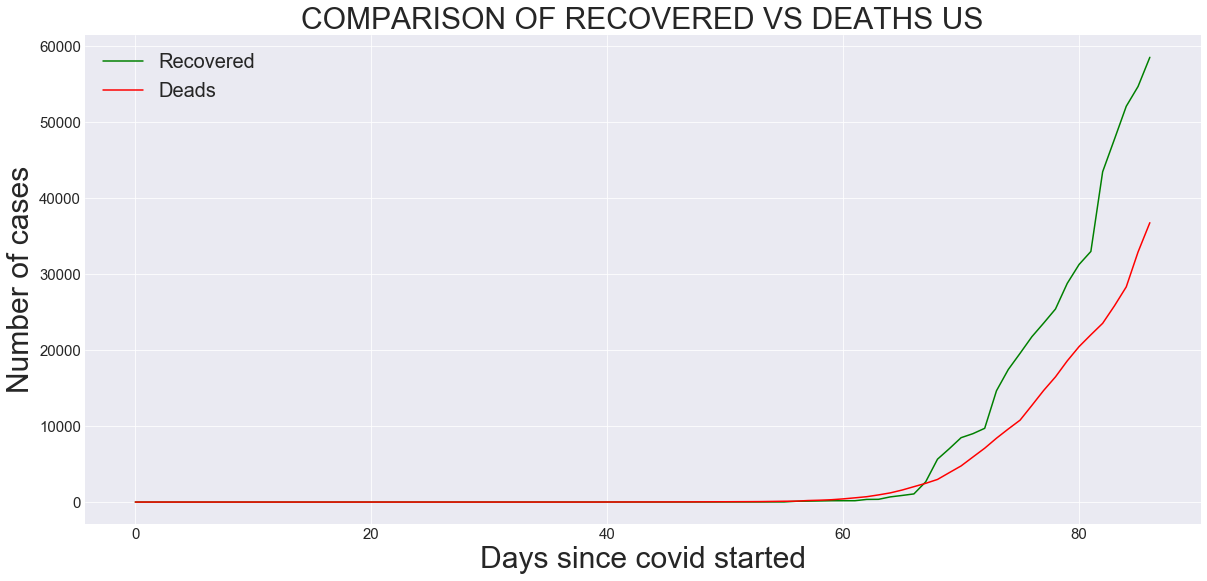

In [46]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, color='green')
plt.plot(dias_eua, mortes_eua, color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


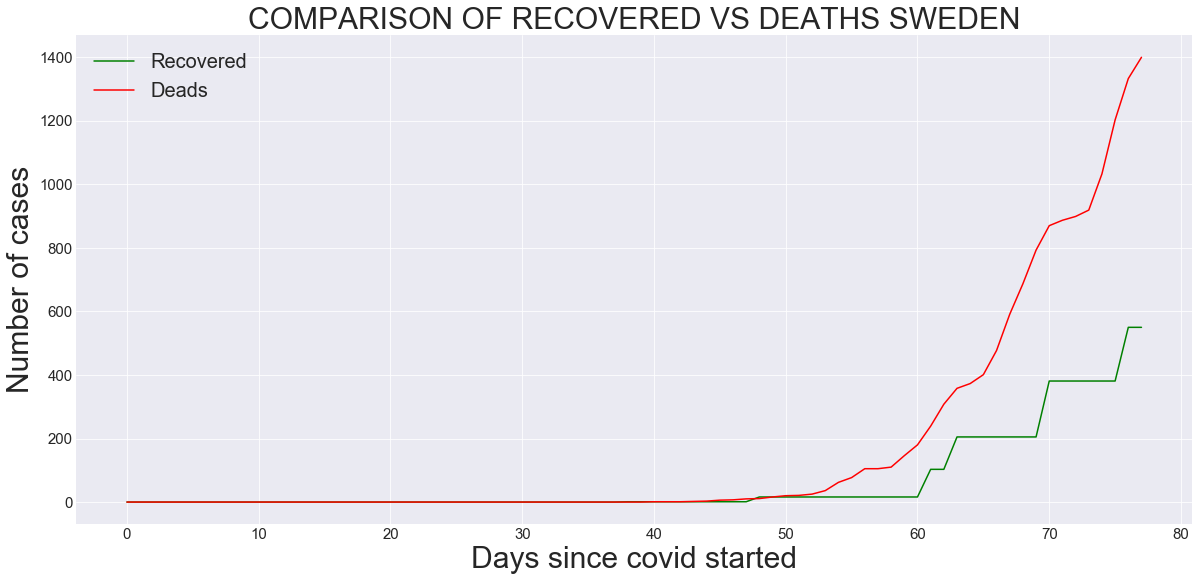

In [47]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


As we can see, in the countries that have already had their growth curve more accentuated, the number of cured people exceeds the number of deaths, while in countries like Brazil and Sweden that have not yet reached this growth curve, the number of deaths is greater than the of recovered, including the number of recovered stabilizes.


# Predict

In this section we will apply sklearn's SVR algorithm to try to predict the number of deaths, cases and recoveries from the 4 countries in the next 40 days.


---

NOTE:  PREDICTS  ARE ALSO BEING OPTIMIZED IN ANOTHER FILE TO REDUCE THE ERROR

In [0]:
#separating the target (value to be forecasted) from the dates
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
# Start from Brazil

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)

In [51]:
params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
# gridsearch is implementing raw in another file on the local machine, as it took more than 24 hours to run
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_br = svm.predict(futuro_brasil)

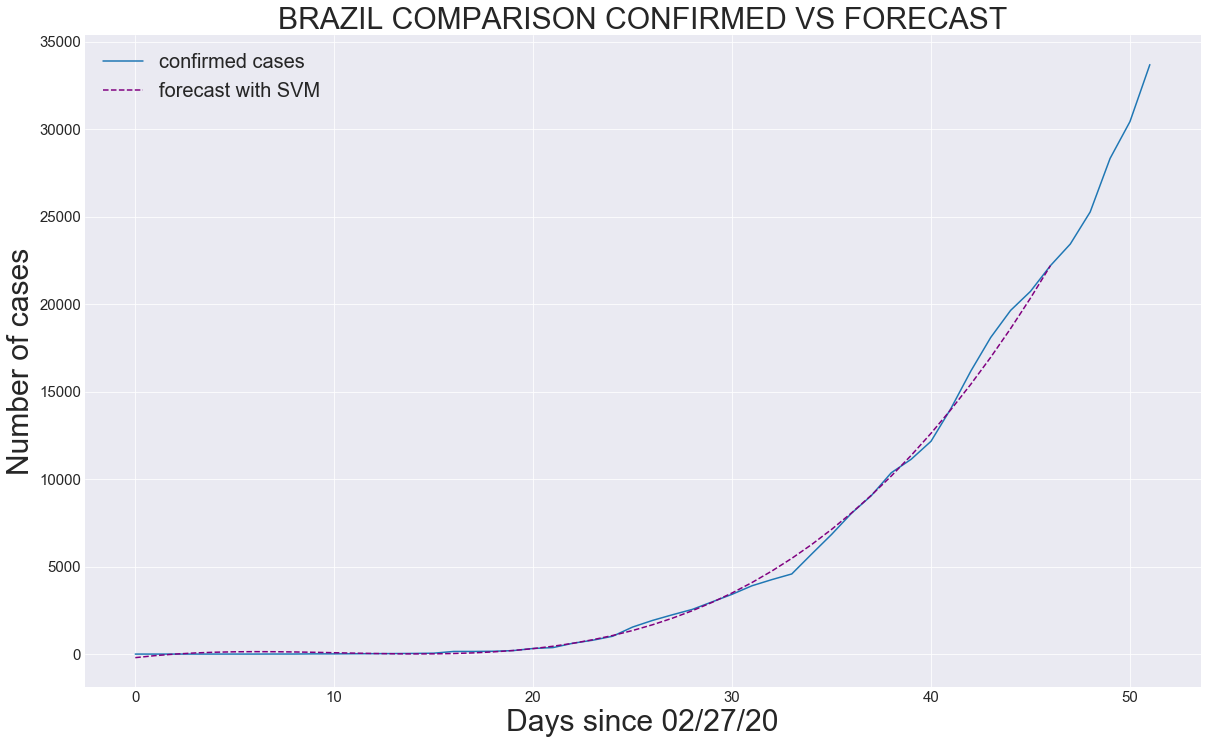

In [53]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:47],pred_caso_br[0:47], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)

params = {'C': [2],
 'coef0': [4.0],
 'epsilon': [0.01],
 'gamma': [0.1],
 'kernel': ['poly'],
 'max_iter': [-1],
 'shrinking': [True],
  'degree':[4] }
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  2.9min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [4.0], 'degree': [4],
                         'epsilon': [0.01], 'gamma': [0.1], 'kernel': ['poly'],
                         'max_iter': [-1], 'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_br = svm.predict(futuro_brasil)

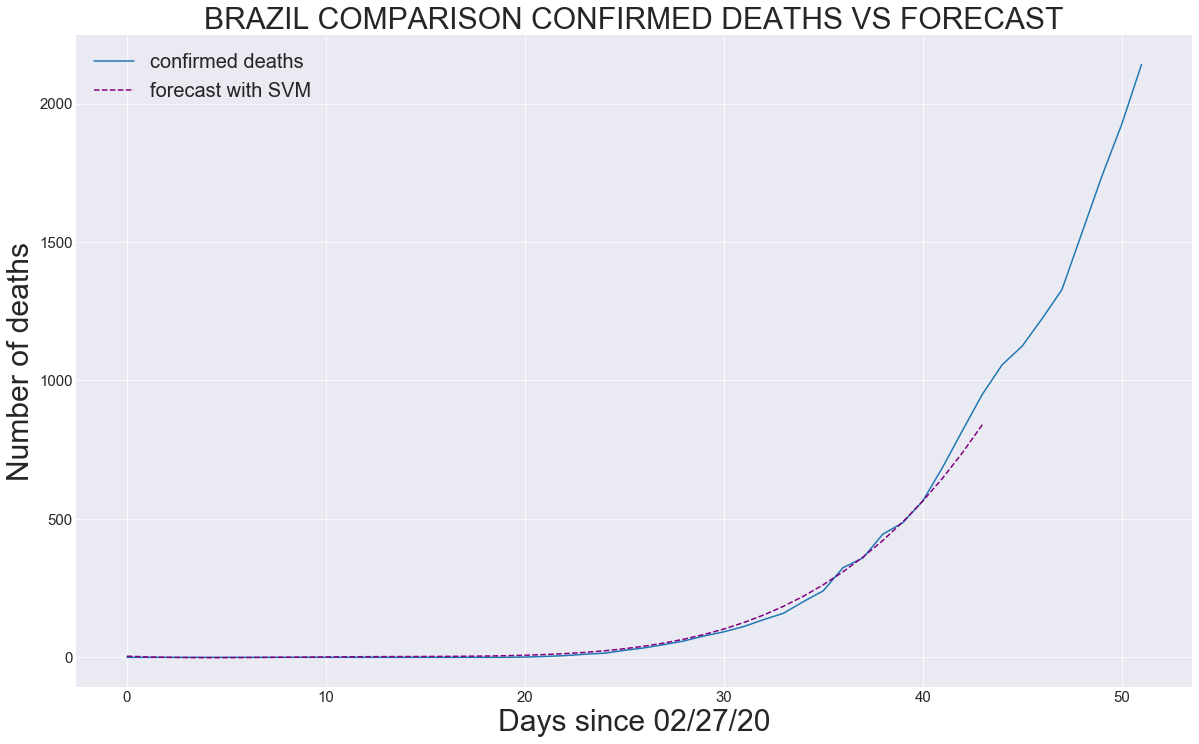

In [56]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil)
plt.plot(futuro_brasil[0:44], pred_mortes_br[0:44], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [71]:
#US
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_eua, target_confirmado_eua, test_size=0.1, random_state=42)

params = {'C': [10], 'coef0': [4.0], 'epsilon': [1], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[True]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   52.7s remaining:   35.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10], 'coef0': [4.0], 'epsilon': [1],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_eua = svm.predict(futuro_eua)

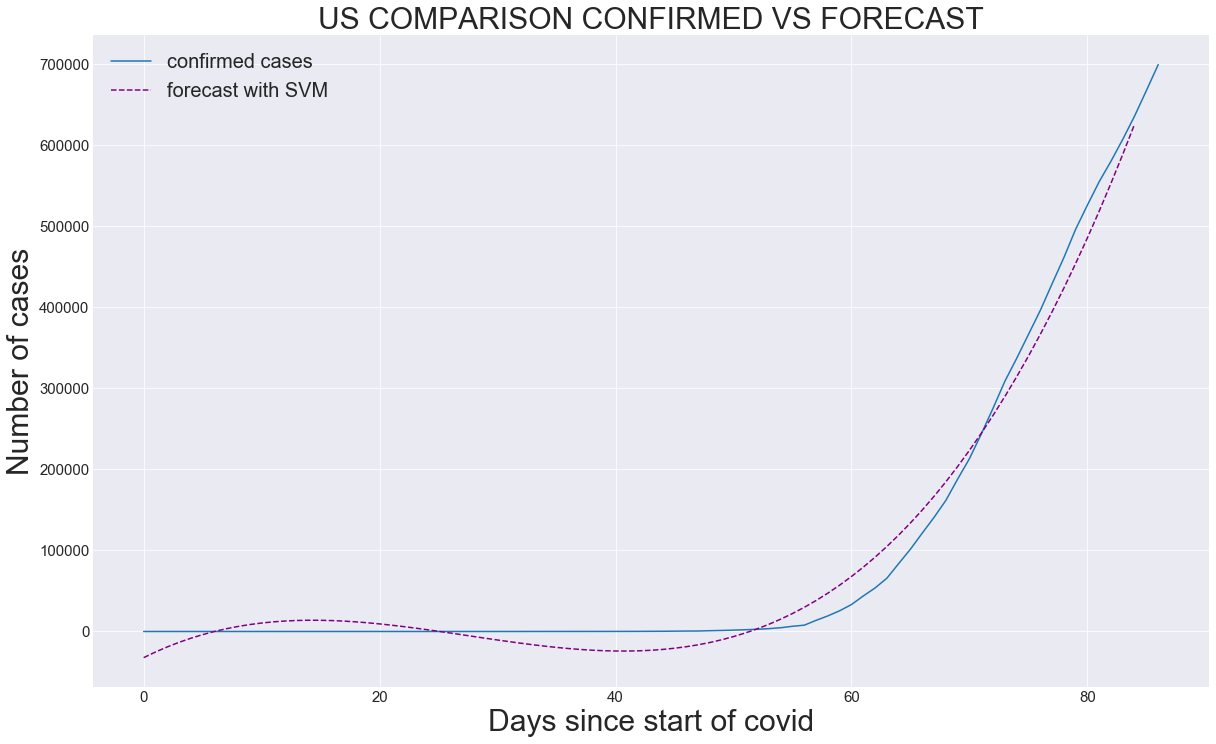

In [73]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua)
plt.plot(futuro_eua[0:85],pred_caso_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_eua, target_mortos_eua, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 21.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_eua = svm.predict(futuro_eua)

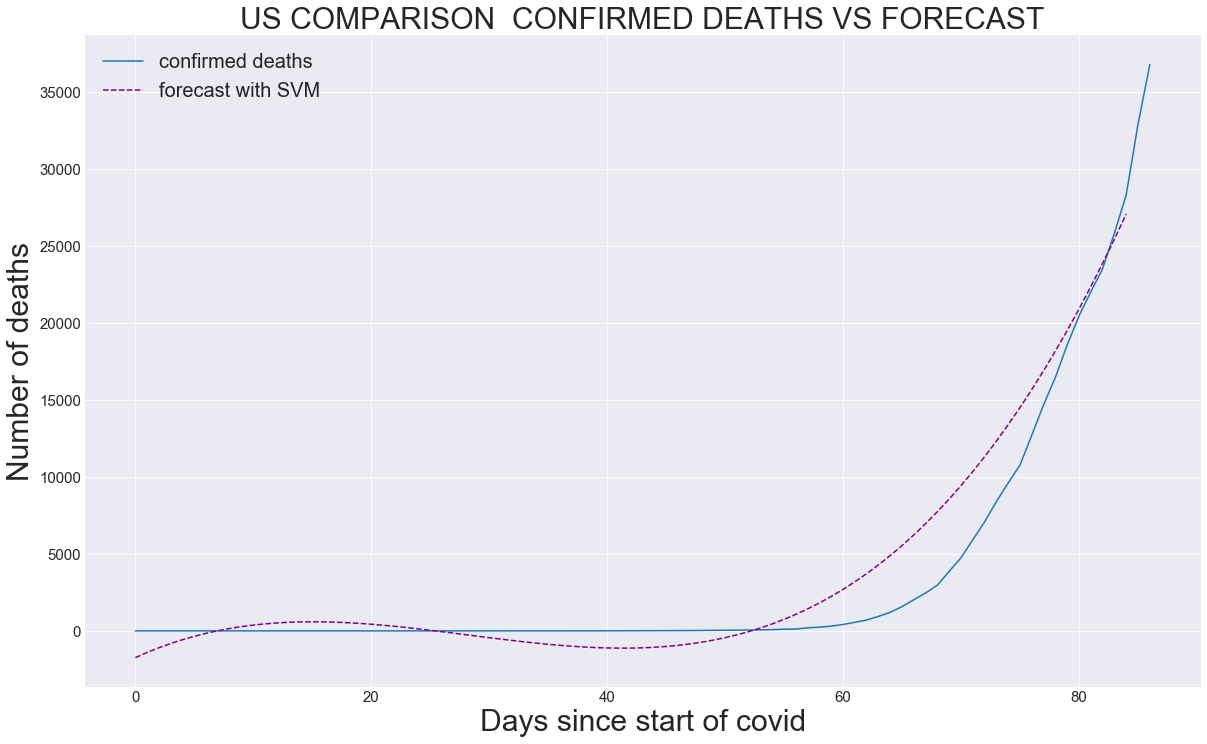

In [76]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua)
plt.plot(futuro_eua[0:85],pred_mortes_eua[0:85], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON  CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [58]:
# Italy Predict
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_italia, target_confirmado_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_italia = svm.predict(futuro_italia)

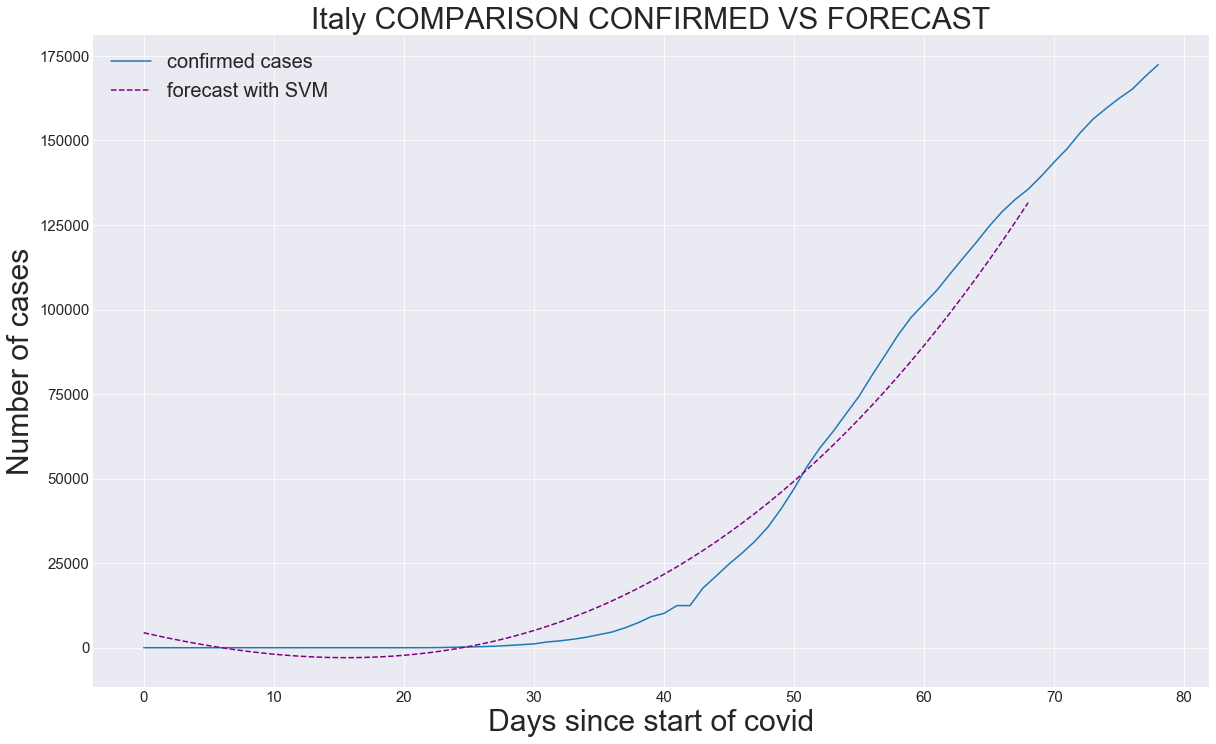

In [60]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia)
plt.plot(futuro_italia[0:69],pred_caso_italia[0:69], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 44.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_italia = svm.predict(futuro_italia)

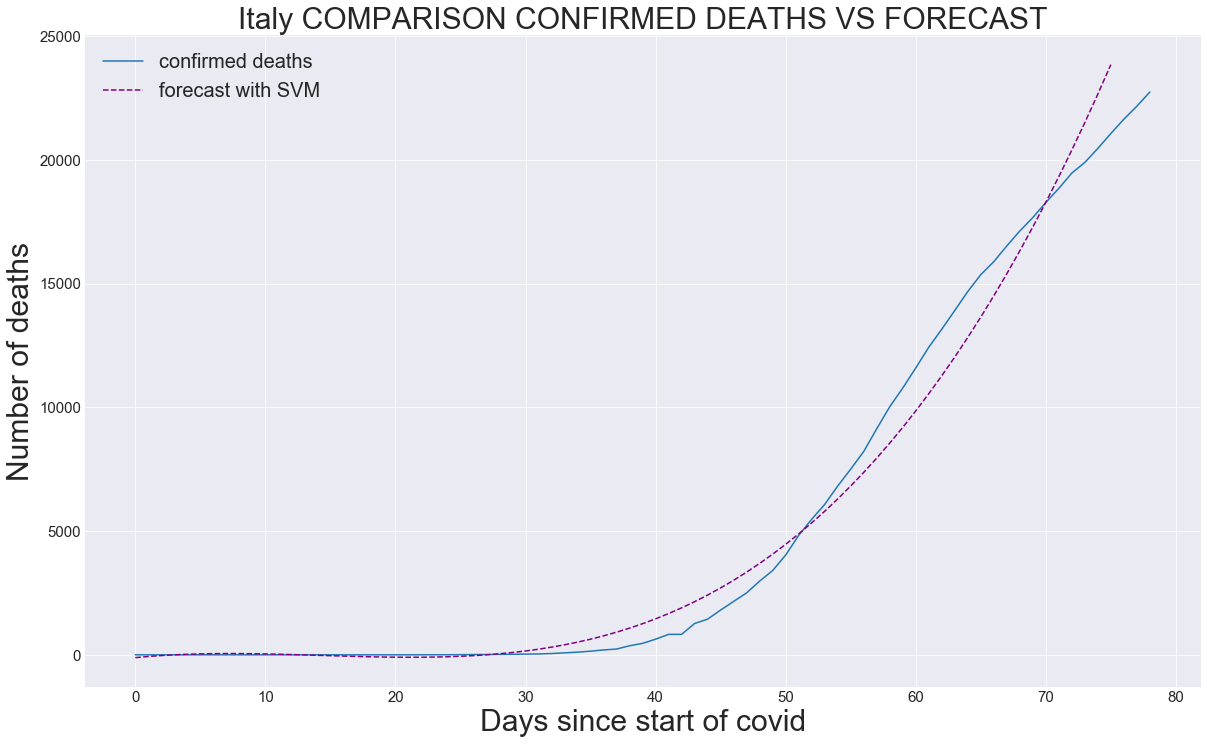

In [64]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia)
plt.plot(futuro_italia[0:76],pred_mortes_italia[0:76], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [65]:
# Sweden predict
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_suecia, target_confirmado_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 24.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_caso_suecia = svm.predict(futuro_suecia)

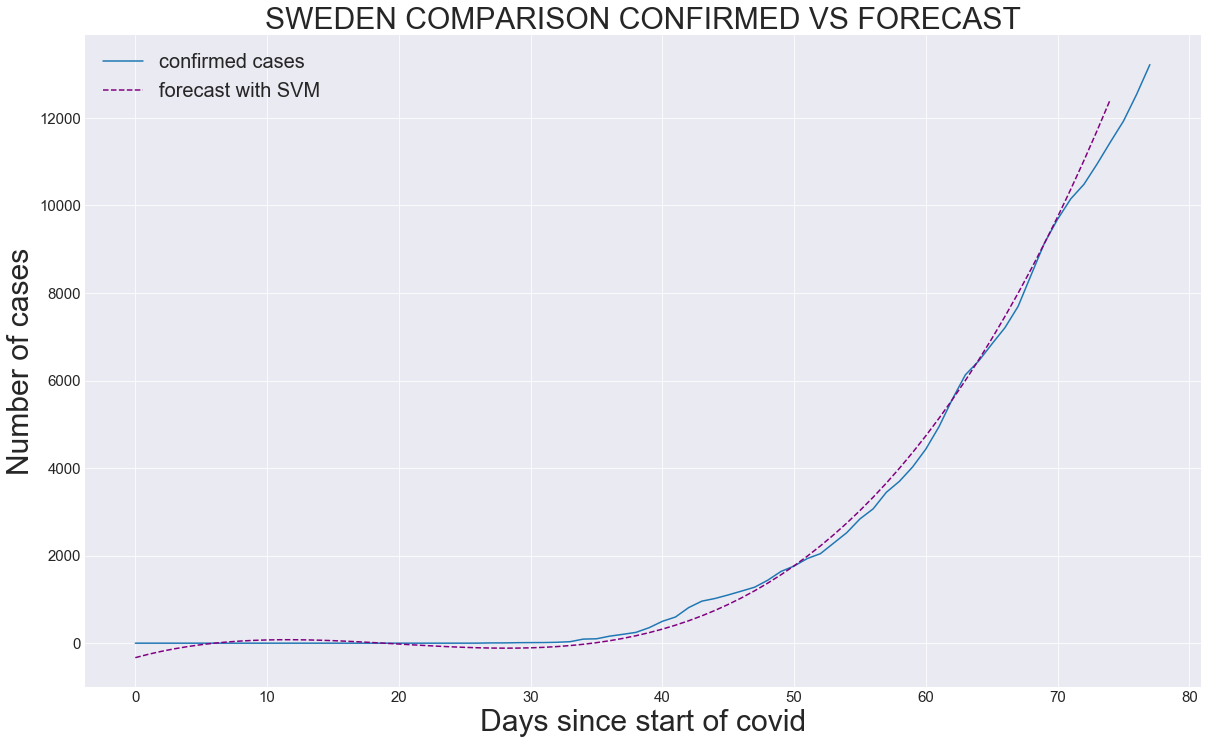

In [67]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia)
plt.plot(futuro_suecia[0:75],pred_caso_suecia[0:75], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_suecia, target_mortos_suecia, test_size=0.1, random_state=42)

params = {'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001], 'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1], 'shrinking':[False]}
svr = SVR()
svm = GridSearchCV(svr, params,scoring='neg_mean_absolute_error', cv=10,return_train_score=False, n_jobs=-1, verbose=1 )
print('fitting...')
svm.fit(X_train,y_train)

fitting...
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 30.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2], 'coef0': [0.0, 3.5], 'epsilon': [0.001],
                         'gamma': [0.5], 'kernel': ['poly'], 'max_iter': [-1],
                         'shrinking': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
pred_mortes_suecia = svm.predict(futuro_suecia)

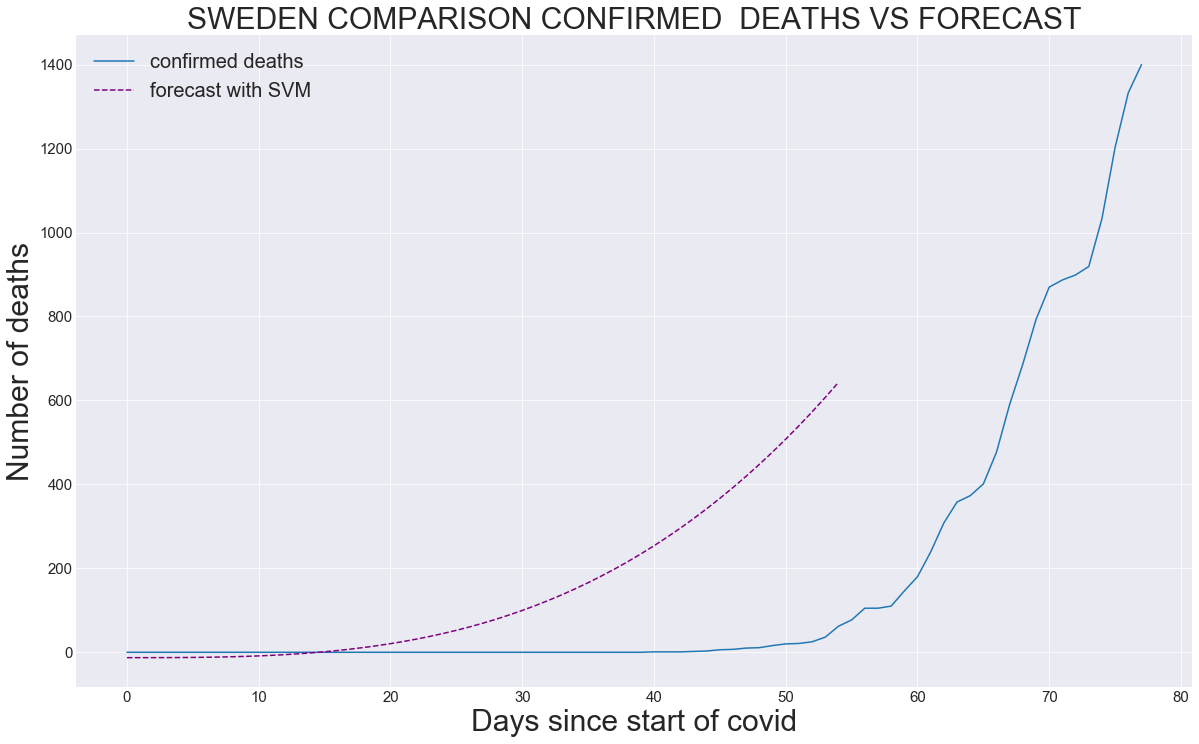

In [70]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia)
plt.plot(futuro_suecia[0:55],pred_mortes_suecia[0:55], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED  DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Results Presentation

In this section we will build 8 data frames, one of confirmed cases and one of deaths for each country. In these dataframes we will have the official cases and those that our program predicted, and it will be updated directly.
In addition to these dataframes, we will redo the graphics made in the graphics section, but now with the forecasts, to see if the scenario of the countries change in relation to each other

Below is the average error of our forecast for the confirmed cases  and the table with the forecasts, real cases and the difference between the two.
since these are forecasts, there are tables that have no differences yet, because our program has 40 days ahead. 

DRAG THE TABLES SCROLL BAR TO SEE ANOTHER DAYS.


---


order of tables:


1. Brazil confirmed
2. Dead Brazil
3. Confirmed USA
4. Dead USA
5. Italy confirmed
6. Dead Italy
7. Sweden confirmed
8. Dead Sweden

In [0]:
index = ['Predict', 'Real', 'Percentage difference', 'Gross difference']
pd.set_option('display.max_columns', 250)

In [0]:
columns =[i for i in datas_futuras_br]
forecast = [round(i, 0) for i in pred_caso_br]
difference =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_brasil) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_br = pd.DataFrame([forecast[40:], casos_brasil[40:], formated_percentage_difference[40:], difference[40:]],
                          columns=columns[40:], index = index)


In [81]:
difference = np.array(difference[40:])
percentage_difference = np.array(percentage_difference[40:])
print(f"The average gross error for confirmed cases in Brazil is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Brazil is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Brazil is: 532.8
The average percentage error for confirmed cases in Brazil is: 2.66%


In [82]:
print('CONFIRMED CASES FOR BRAZIL: ')
df_case_br

CONFIRMED CASES FOR BRAZIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,12617,13971,15418,16960,18601,20343,22189,24143,26207,28384,30677,33090,35626.0,38286.0,41075.0,43996.0,47050.0,50242.0,53574.0,57050.0,60671.0,64442.0,68366.0,72444.0,76681.0,81079.0,85642.0,90371.0,95271.0,100344.0,105594.0,111022.0,116633.0,122429.0,128414.0,134589.0,140959.0,147526.0,154293.0,161264.0,168440.0,175826.0,183424.0,191237.0,199268.0,207521.0,215998.0,224702.0,233636.0,242803.0,252206.0,261848.0
Real,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,3.74%,-0.45%,-4.66%,-6.26%,-5.29%,-1.86%,-0.02%,3.04%,3.74%,0.22%,0.83%,-1.76%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,455,-63,-753,-1132,-1038,-385,-4,712,944,63,252,-592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_br]
forecast = [round(i, 0)  for i in pred_mortes_br]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_brasil)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_br = pd.DataFrame([forecast[40:], mortes_brasil[40:], formated_percentage_difference[40:], 
                            difference[40:]], columns=columns[40:], index = index)


In [84]:
difference = np.array(difference[40:])
percentage_difference = np.array(percentage_difference[40:])
print(f"The average gross error for deaths in Brazil is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Brazil is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Brazil is: 51.7
The average percentage error for deaths in Brazil is: 4.58%


In [85]:
print('DEATHS IN BRASIL: ')
df_death_br

DEATHS IN BRASIL: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,564,647,739,840,952,1074,1208,1354,1512,1685,1871,2073,2290.0,2524.0,2775.0,3045.0,3334.0,3643.0,3973.0,4325.0,4700.0,5098.0,5522.0,5971.0,6447.0,6951.0,7483.0,8046.0,8640.0,9266.0,9926.0,10620.0,11350.0,12116.0,12921.0,13766.0,14651.0,15578.0,16548.0,17563.0,18624.0,19732.0,20888.0,22095.0,23353.0,24665.0,26030.0,27452.0,28931.0,30468.0,32067.0,33727.0
Real,564,686,819,950,1057,1124,1223,1328,1532,1736,1924,2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,0.0%,-5.69%,-9.77%,-11.58%,-10.03%,-4.45%,-1.31%,1.88%,-1.31%,-3.0%,-2.75%,-3.22%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,0,-39,-80,-110,-106,-50,-16,25,-20,-52,-53,-69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_us]
forecast = [round(i, 0) for i in pred_caso_eua]
difference =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_eua) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_us = pd.DataFrame([forecast[75:], casos_eua[75:], formated_percentage_difference[75:], difference[75:]],
                          columns=columns[75:], index = index)


In [90]:
difference = np.array(difference[75:])
percentage_difference = np.array(percentage_difference[75:])
print(f"The average gross error for confirmed cases in US is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in US is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in US is: 25936.2
The average percentage error for confirmed cases in US is: 5.34%


In [91]:
print('CONFIRMED CASES IN US: ')
df_case_us

CONFIRMED CASES IN US: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,339923,366650,394593,423777,454228,485970,519028,553428,589195,626353,664929,704946,746430.0,789406.0,833899.0,879934.0,927536.0,976731.0,1027543.0,1079997.0,1134119.0,1189933.0,1247465.0,1306740.0,1367783.0,1430618.0,1495271.0,1561768.0,1630132.0,1700389.0,1772565.0,1846684.0,1922771.0,2000852.0,2080951.0,2163093.0,2247304.0,2333609.0,2422033.0,2512601.0,2605337.0,2700267.0,2797417.0,2896810.0,2998473.0,3102430.0,3208706.0,3317327.0,3428317.0,3541702.0,3657506.0,3775755.0
Real,366667,396223,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,-7.29%,-7.46%,-8.03%,-8.16%,-8.52%,-7.68%,-6.53%,-4.68%,-3.04%,-1.57%,-0.43%,0.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,-26744,-29574,-34460,-37661,-42308,-40427,-36285,-27191,-18476,-9997,-2873,5239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_us]
forecast = [round(i, 0)  for i in pred_mortes_eua]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_eua)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_us = pd.DataFrame([forecast[75:], mortes_eua[75:], formated_percentage_difference[75:], 
                            difference[75:]], columns=columns[75:], index = index)


In [94]:
difference = np.array(difference[75:])
percentage_difference = np.array(percentage_difference[75:])
print(f"The average gross error for deaths in US is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in US is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in US is: 2056.4
The average percentage error for deaths in US is: 10.74%


In [95]:
print('DEATHS IN US ')
df_death_us

DEATHS IN US 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,14512,15682,16905,18184,19519,20912,22363,23874,25446,27080,28778,30539,32367.0,34260.0,36222.0,38252.0,40352.0,42524.0,44767.0,47084.0,49476.0,51943.0,54487.0,57109.0,59810.0,62591.0,65453.0,68398.0,71427.0,74540.0,77739.0,81025.0,84399.0,87862.0,91416.0,95061.0,98799.0,102630.0,106557.0,110579.0,114699.0,118917.0,123234.0,127652.0,132172.0,136795.0,141521.0,146352.0,151290.0,156335.0,161489.0,166752.0
Real,10783,12722,14695,16478,18586,20462,22019,23528,25831,28325,32916,36773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,34.58%,23.26%,15.04%,10.35%,5.01%,2.19%,1.56%,1.47%,-1.49%,-4.4%,-12.57%,-16.95%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,3729,2959,2210,1705,932,449,344,346,-385,-1245,-4139,-6234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_it]
forecast = [round(i, 0) for i in pred_caso_italia]
difference =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_italia) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_it = pd.DataFrame([forecast[67:], casos_italia[67:], formated_percentage_difference[67:], difference[67:]],
                          columns=columns[67:], index = index)


In [97]:
difference = np.array(difference[67:])
percentage_difference = np.array(percentage_difference[67:])
print(f"The average gross error for confirmed cases in Italy is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Italy is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Italy is: 9758.2
The average percentage error for confirmed cases in Italy is: 6.05%


In [98]:
print('CONFIRMED CASES IN ITALY : ')
df_case_it

CONFIRMED CASES IN ITALY : 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,125814,131621,137583,143701,149978,156415,163014,169776,176703,183797,191059,198491,206094.0,213871.0,221822.0,229950.0,238256.0,246742.0,255409.0,264259.0,273294.0,282515.0,291924.0,301523.0,311313.0,321295.0,331472.0,341846.0,352417.0,363187.0,374158.0,385332.0,396711.0,408295.0,420087.0,432088.0,444300.0,456724.0,469363.0,482217.0,495289.0,508579.0,522091.0,535825.0,549782.0,563966.0,578376.0,593015.0,607885.0,622987.0,638323.0,653894.0
Real,132547,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,-5.08%,-2.93%,-1.32%,0.05%,1.63%,2.72%,4.25%,6.43%,8.75%,11.29%,13.09%,15.11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,-6733,-3966,-1840,75,2401,4144,6650,10260,14215,18641,22117,26056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_it]
forecast = [round(i, 0)  for i in pred_mortes_italia]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_italia)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_it = pd.DataFrame([forecast[67:], mortes_italia[67:], formated_percentage_difference[67:], 
                            difference[67:]], columns=columns[67:], index = index)


In [100]:
difference = np.array(difference[67:])
percentage_difference = np.array(percentage_difference[67:])
print(f"The average gross error for deaths in Italy is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Italy is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Italy is: 1904.6
The average percentage error for deaths in Italy is: 9.12%


In [101]:
print('DEATHS IN ITALY: ')
df_death_it

DEATHS IN ITALY: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,15398,16325,17288,18287,19323,20397,21509,22661,23852,25083,26356,27670,29027.0,30427.0,31870.0,33358.0,34891.0,36470.0,38095.0,39767.0,41487.0,43255.0,45073.0,46940.0,48857.0,50826.0,52846.0,54918.0,57044.0,59223.0,61457.0,63746.0,66090.0,68491.0,70949.0,73464.0,76038.0,78671.0,81363.0,84116.0,86930.0,89806.0,92744.0,95745.0,98810.0,101939.0,105133.0,108392.0,111719.0,115112.0,118572.0,122101.0
Real,16523,17127,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,-6.81%,-4.69%,-2.16%,0.04%,2.51%,4.77%,8.09%,10.73%,13.21%,15.88%,18.88%,21.65%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,-1125,-803,-382,7,473,928,1610,2195,2784,3438,4185,4925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_su]
forecast = [round(i, 0) for i in pred_caso_suecia]
difference =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_suecia) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_su = pd.DataFrame([forecast[66:], casos_suecia[66:], formated_percentage_difference[66:], difference[66:]],
                          columns=columns[66:], index = index)


In [103]:
difference = np.array(difference[66:])
percentage_difference = np.array(percentage_difference[66:])
print(f"The average gross error for confirmed cases in Sweden is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Sweden is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Sweden is: 614.4
The average percentage error for confirmed cases in Sweden is: 5.44%


In [104]:
print('CONFIRMED CASES IN SWEDEN: ')
df_case_su

CONFIRMED CASES IN SWEDEN: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,7463,7996,8552,9133,9739,10371,11028,11711,12421,13159,13925,14719,15542.0,16394.0,17276.0,18189.0,19133.0,20108.0,21115.0,22154.0,23226.0,24332.0,25472.0,26646.0,27855.0,29100.0,30380.0,31698.0,33052.0,34443.0,35873.0,37341.0,38848.0,40395.0,41982.0,43609.0,45277.0,46987.0,48739.0,50533.0,52371.0,54252.0,56177.0,58146.0,60161.0,62222.0,64328.0,66481.0,68681.0,70929.0,73225.0,75570.0
Real,7206,7693,8419,9141,9685,10151,10483,10948,11445,11927,12540,13216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,3.55%,3.93%,1.58%,-0.09%,0.56%,2.16%,5.19%,6.97%,8.53%,10.33%,11.04%,11.37%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,256,302,133,-8,54,219,544,763,976,1232,1384,1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns =[i for i in datas_futuras_su]
forecast = [round(i, 0)  for i in pred_mortes_suecia]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_suecia)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_su = pd.DataFrame([forecast[66:], mortes_suecia[66:], formated_percentage_difference[66:], 
                            difference[66:]], columns=columns[66:], index = index)


In [107]:
difference = np.array(difference[66:])
percentage_difference = np.array(percentage_difference[66:])
print(f"The average gross error for deaths in Sweden is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Sweden is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Sweden is: 595.2
The average percentage error for deaths in Sweden is: 72.56%


In [108]:
print('DEATHS IN SWEDEN: ')
df_death_su

DEATHS IN SWEDEN: 


,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20
Predict,1184,1240,1297,1355,1416,1478,1541,1607,1675,1744,1815,1888,1963.0,2040.0,2119.0,2200.0,2283.0,2368.0,2455.0,2545.0,2636.0,2729.0,2825.0,2923.0,3023.0,3125.0,3230.0,3337.0,3446.0,3558.0,3671.0,3788.0,3907.0,4028.0,4151.0,4278.0,4406.0,4538.0,4671.0,4808.0,4947.0,5089.0,5233.0,5380.0,5530.0,5682.0,5838.0,5996.0,6157.0,6320.0,6487.0,6657.0
Real,477,591,687,793,870,887,899,919,1033,1203,1333,1400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Percentage difference,148.22%,109.64%,88.65%,70.87%,62.64%,66.52%,71.41%,74.86%,62.05%,44.89%,36.16%,34.86%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross difference,707,648,609,562,545,590,642,688,641,540,482,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


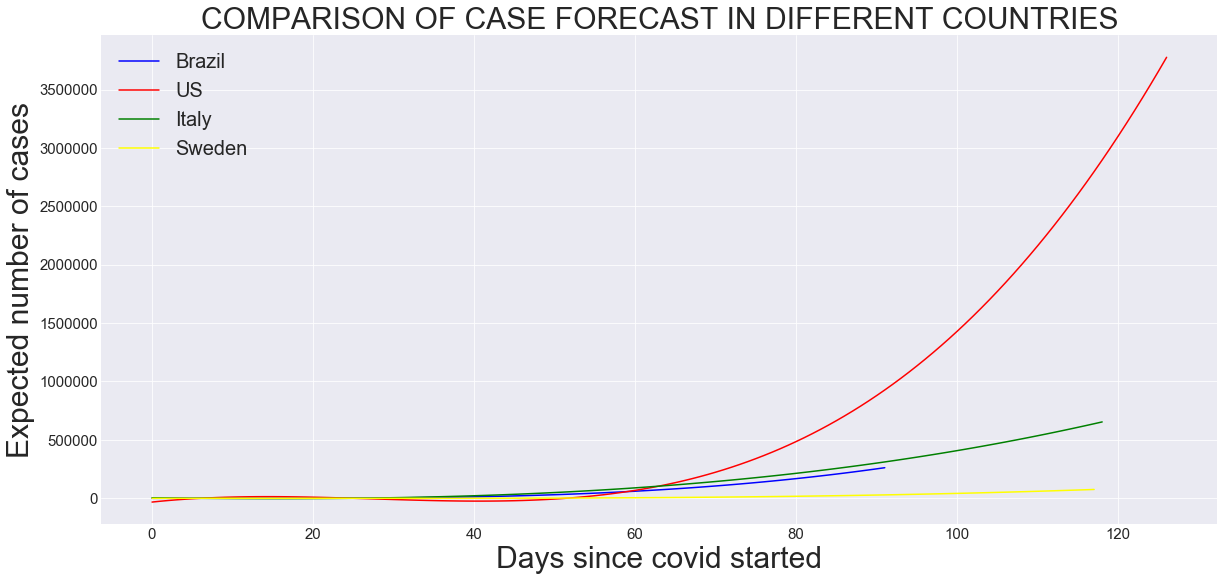

In [109]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARISON OF CASE FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


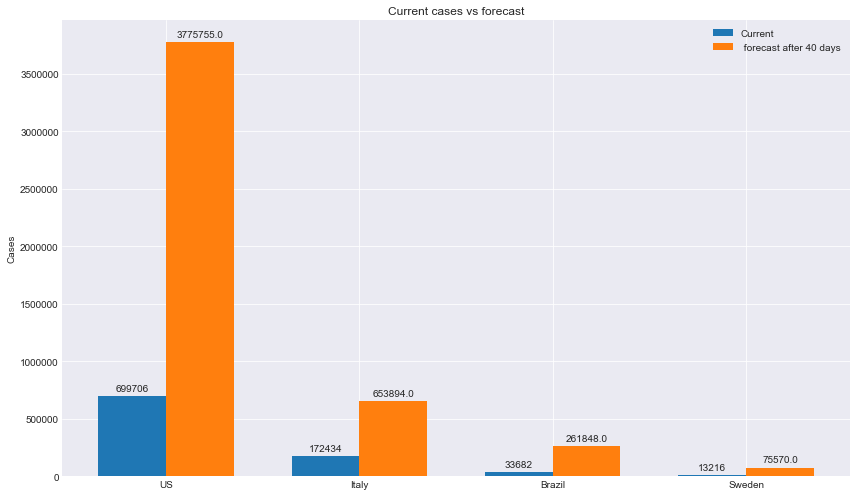

In [110]:
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
apos_40 = [pred_caso_eua[-1], pred_caso_italia[-1], pred_caso_br[-1],  pred_caso_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Current')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Current cases vs forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

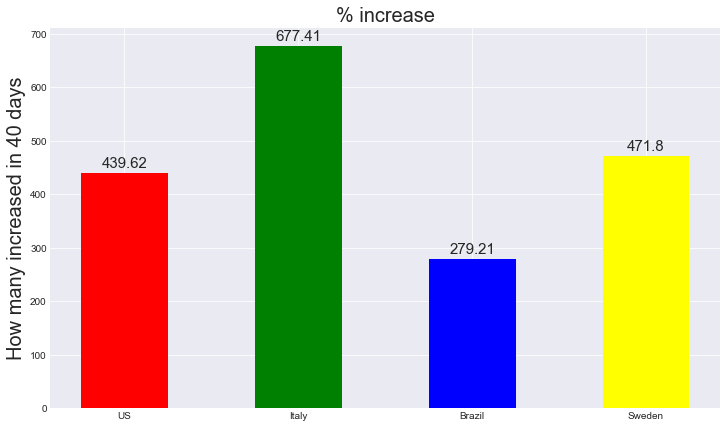

In [111]:
eua_porc = round(((pred_caso_eua[-1] - confirmados_eua)/ confirmados_eua)*100 , 2)
br_porc =  round(((pred_caso_br[-1] - confirmados_brasil)/ confirmados_brasil)*100, 2)
it_porc =  round(((pred_caso_italia[-1] - confirmados_italia)/ confirmados_italia)*100, 2)
su_porc =  round(((pred_caso_suecia[-1] - confirmados_suecia)/ confirmados_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('How many increased in 40 days', size = 20)
plt.title('% increase', size=20)
plt.show()

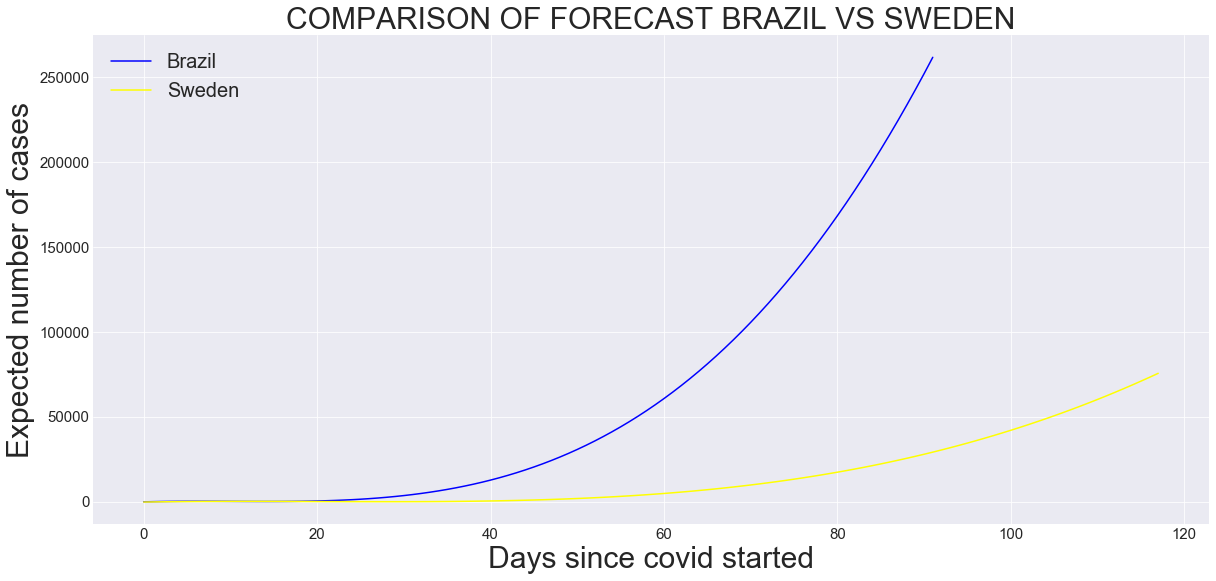

In [112]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')


plt.title('COMPARISON OF FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


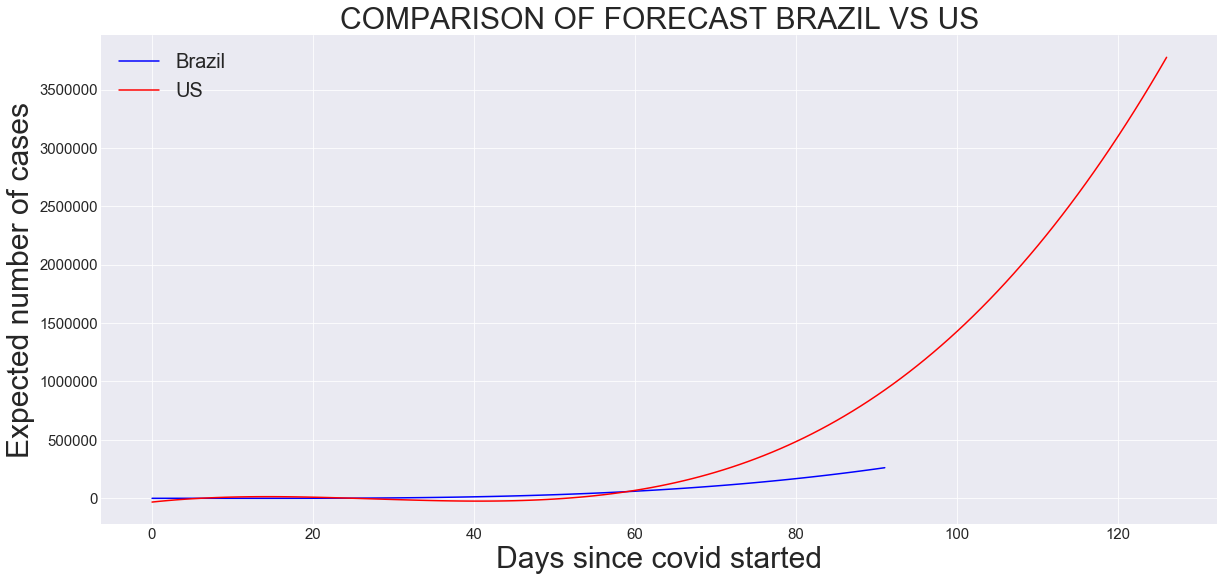

In [113]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')

plt.title('COMPARISON OF FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


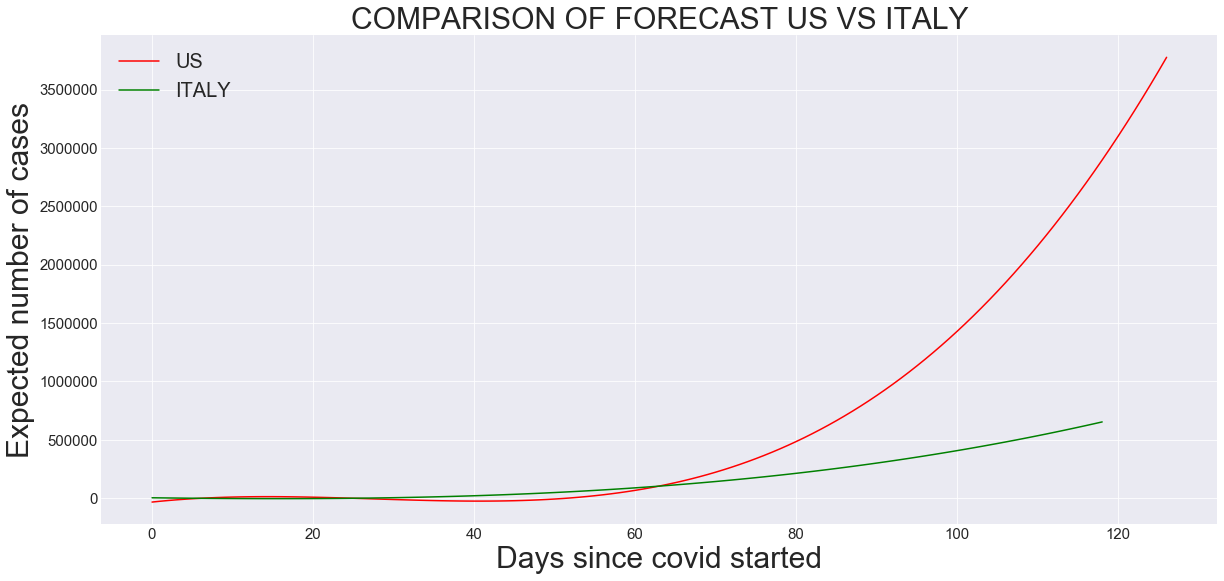

In [114]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')


plt.title('COMPARISON OF FORECAST US VS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['US', 'ITALY'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


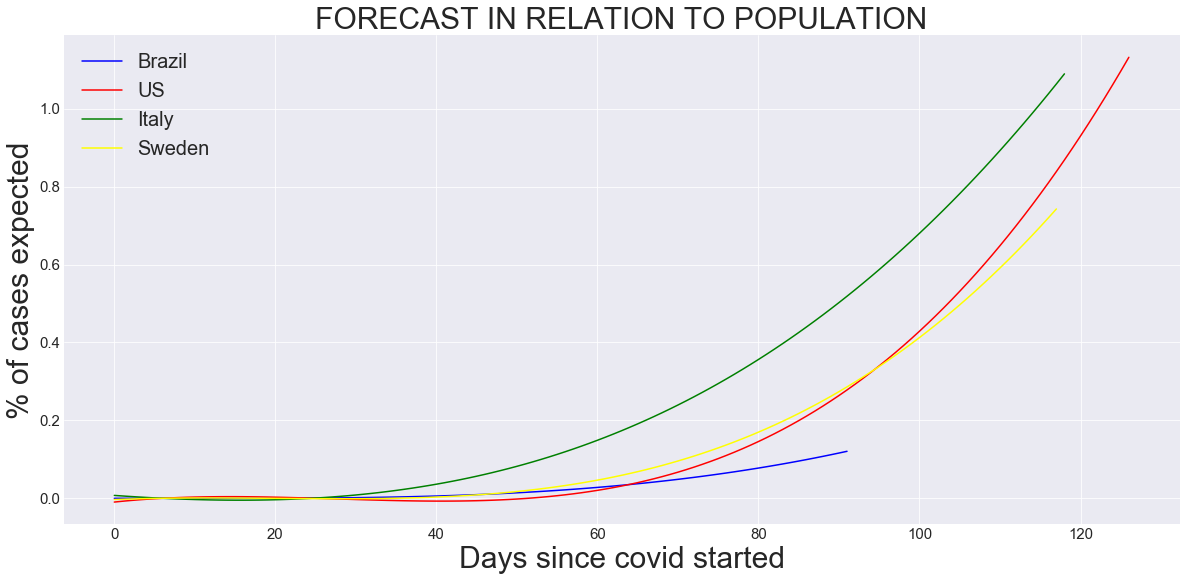

In [115]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('FORECAST IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases expected', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


ValueError: ignored

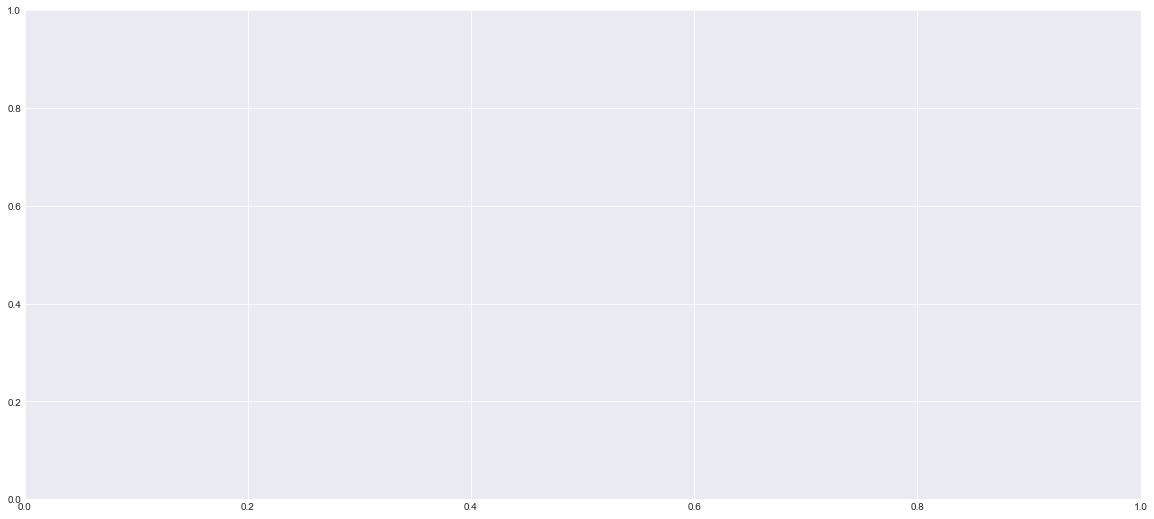

In [116]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil[0:-1], pred_mortes_br, color='blue')
plt.plot(futuro_eua[0:-1], pred_mortes_eua, color='red')
plt.plot(futuro_italia[0:-1], pred_mortes_italia, color='green')
plt.plot(futuro_suecia[0:-1], pred_mortes_suecia , color='yellow')

plt.title('COMPARISON OF DEATH FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US','Italy', 'SWEDEN'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
apos_40 = [pred_mortes_eua[-1], pred_mortes_italia[-1], pred_mortes_br[-1],  pred_mortes_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='currently')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths')
ax.set_title('currently deaths vs forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [0]:
eua_porc = round(((pred_mortes_eua[-1] - mortos_eua)/ mortos_eua)*100 , 2)
br_porc =  round(((pred_mortes_br[-1] - mortos_brasil)/ mortos_brasil)*100, 2)
it_porc =  round(((pred_mortes_italia[-1] - mortos_italia)/ mortos_italia)*100, 2)
su_porc =  round(((pred_mortes_suecia[-1] - mortos_suecia)/ mortos_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% increase in deaths after 40 days', size = 20)
plt.title('% increase', size=20)
plt.show()

In [0]:
fig = plt.figure(figsize=(12, 7))
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
atualmente = [round(num, 2) for num in atualmente]
apos_40 = [(pred_mortes_eua[-1]/pred_caso_eua[-1])*100, (pred_mortes_italia[-1]/pred_caso_italia[-1])*100,
           (pred_mortes_br[-1]/ pred_caso_br[-1])*100, (pred_mortes_suecia[-1]/pred_caso_suecia[-1])*100]
apos_40 = [round(m, 0) for m in apos_40]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='currently')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% mortality')
ax.set_title('Current vs predicted mortality in%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

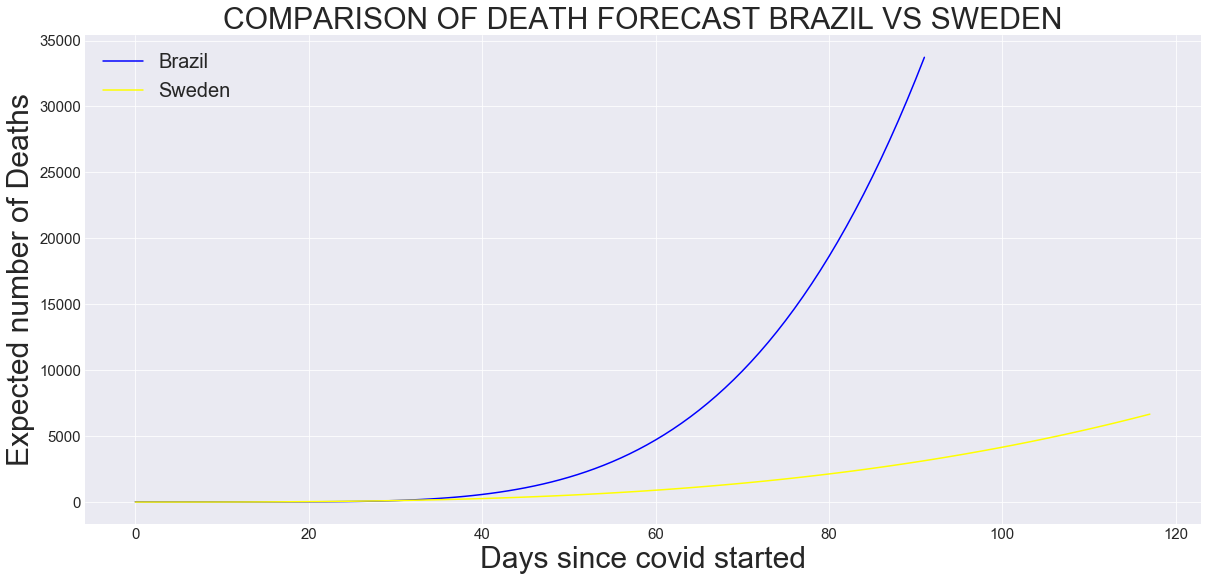

In [117]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


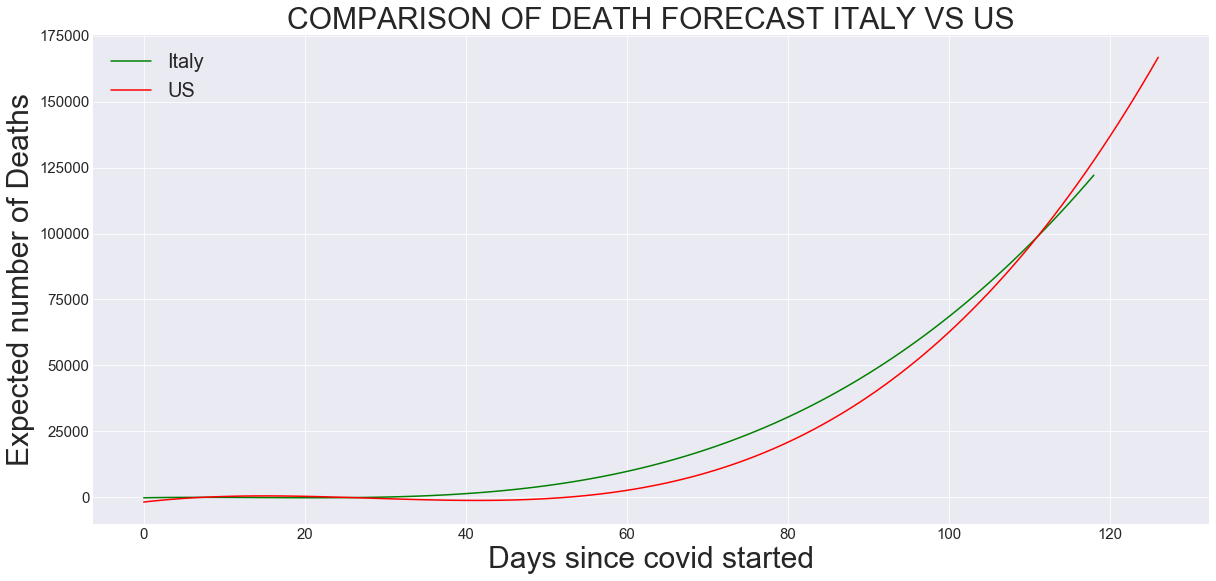

In [118]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARISON OF DEATH FORECAST ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


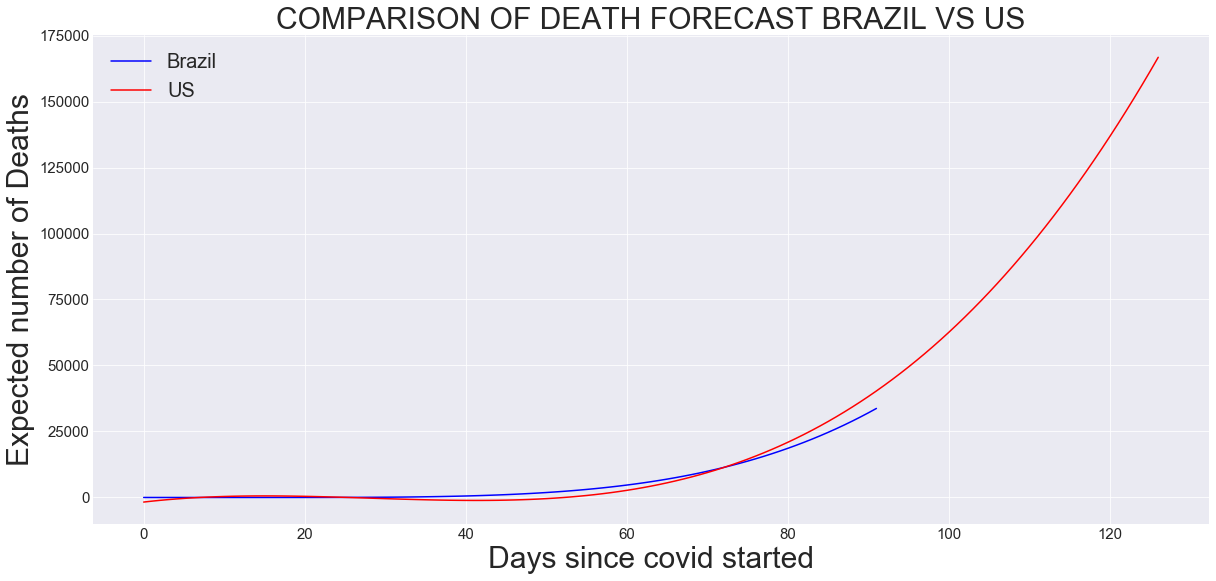

In [119]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


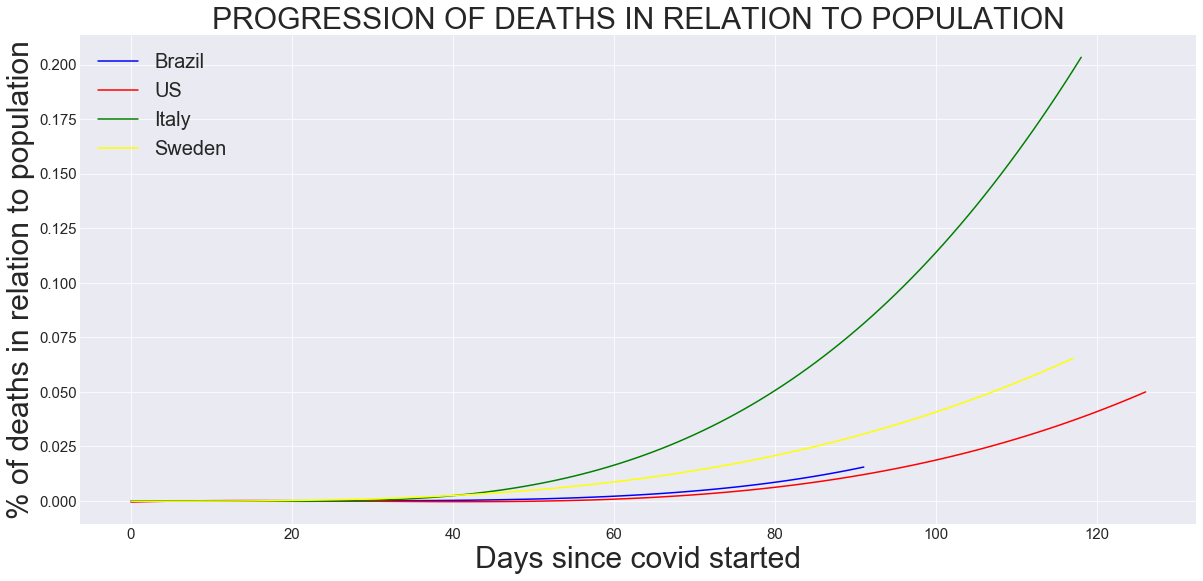

In [121]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# About Me

Hello, I am Lucas Marchiori and currently (04/2020) I am studying the 3rd semester of Computer Engineering at the Federal University of São Carlos (UFSCar), and I have been in the computer business since high school, where I was a computer technician at Etec de Nova Odessa.

Despite having been in the computing area for a long time, I recently found myself in the data science area,  that  is my first project in this area, where I decided to use the quarantine free time to learn a little about this area , so vast that it has interested me more and more.

Currently I have been looking to study more about data science, machine learning and its "sub divisions"

Some links:

My github: https://bit.ly/GitLucas

My Linkedin: https://bit.ly/2XJR5Z0